# Humidex is an index that is calculated, based on air temperature and humidity, devised by the Canadian meteorologists, to describe the experiences of an average person during hot.

Its formula is given by:

$H = T + (0.5555*(e-10)) $, where $T$ is the temperature in Celsius and $e$ is the vapor pressure in millibars (mb).

$e$ cand be defined as:

$e = 6.11*e^{5417.7530*({1 \over 273.16} - {1 \over dewpoint})}$

In [72]:
# Function to get e and H given T in celsius and dewpoint also in celsius

def get_e(td):
    e = 6.11*np.exp(5417.7530*((1/273.16) - 1/(td+273.16)))
    return e

def get_humidex(T,td):
    H = T + (0.5555*(get_e(td) - 10))
    return H

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('default')

In [74]:
data = pd.read_csv("DATA111_HW.csv")

# 1 - By the simplified equation

reference: https://journals.ametsoc.org/doi/pdf/10.1175/BAMS-86-2-225

By this article the Dew point is calculated, with 0.1º precision by HR > 50%, by

$ T_{dew} = T_{air}  - {100 - HR \over 5}$, where HR is the relative humidity and $T_{air}$ is the air temperature in degree Celsius

In [75]:
# getting Tdew for max,mean and min temperatures all of them with the relative humidty of the day
def get_td(t,hr):
    td = t - (100-hr)/5
    return td

temp_vars = ['MIN_N_AIRTMP_MED10','MEAN_N_AIRTMP_MED10','MAX_N_AIRTMP_MED10']

data['td_min'] = get_td(data[temp_vars[0]],data['MIN_N_AIRMTR_PCT10'])
data['td_max'] = get_td(data[temp_vars[2]],data['MIN_N_AIRMTR_PCT10'])
data['td_mean'] = get_td(data[temp_vars[1]],data['MIN_N_AIRMTR_PCT10'])

In [76]:
# Getting humidex

data['h_min'] = get_humidex(data[temp_vars[0]],data['td_min'])
data['h_max'] = get_humidex(data[temp_vars[2]],data['td_max'])
data['h_mean'] = get_humidex(data[temp_vars[1]],data['td_mean'])

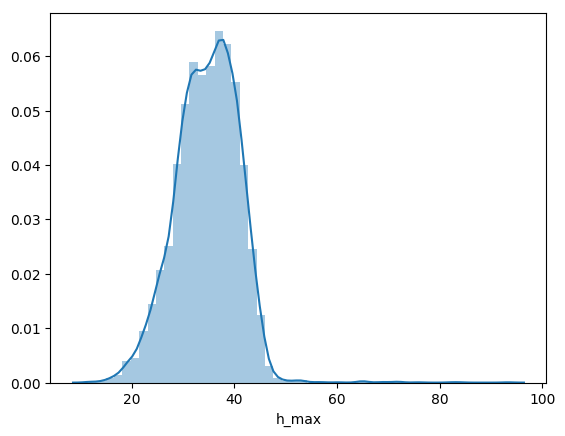

In [77]:
sns.distplot(data['h_max'])

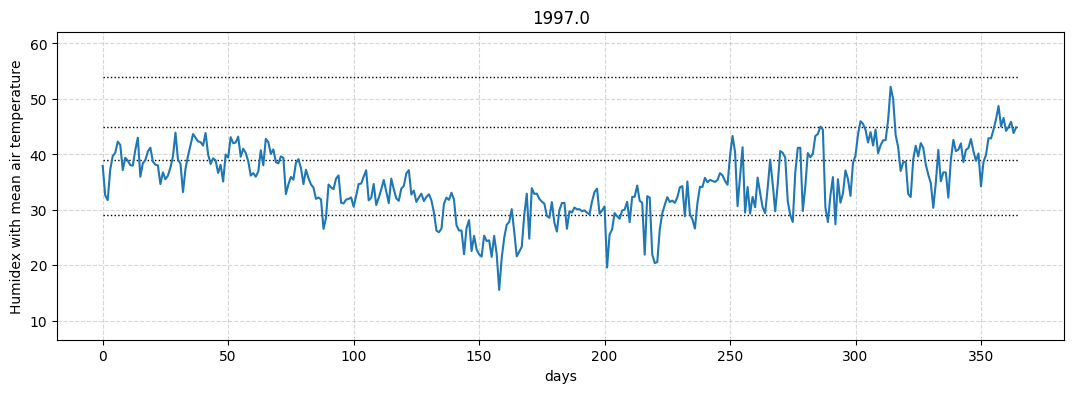

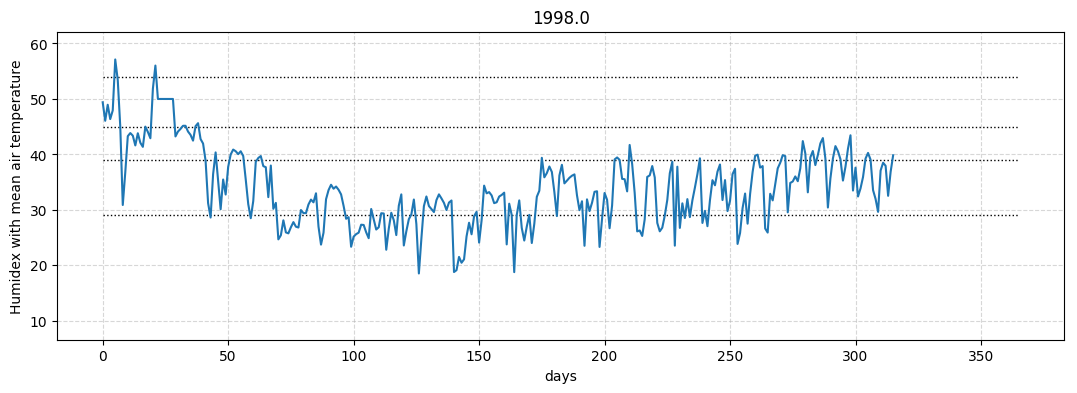

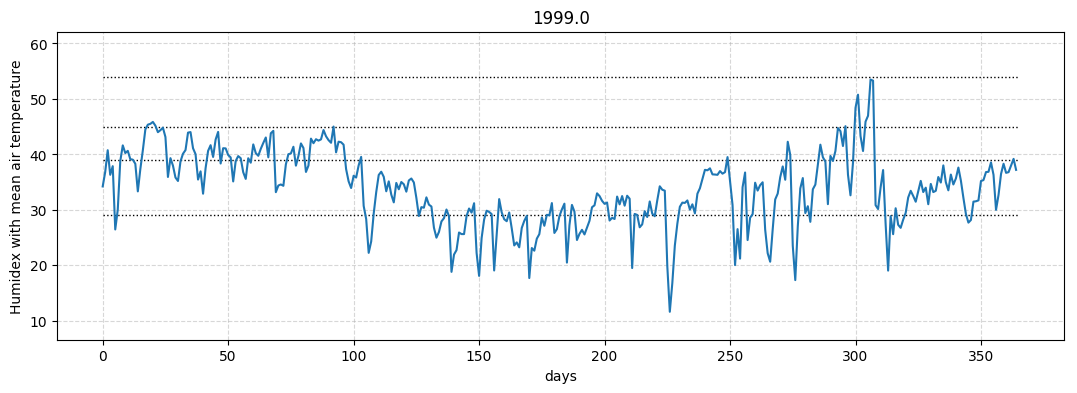

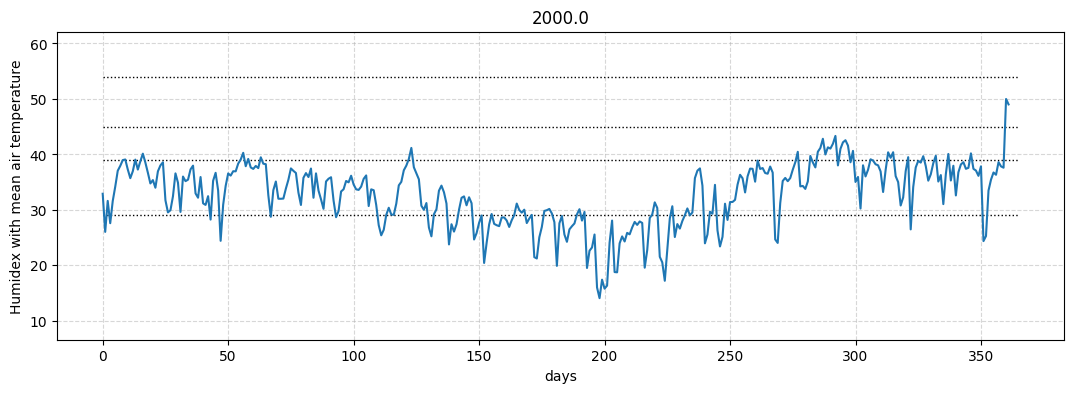

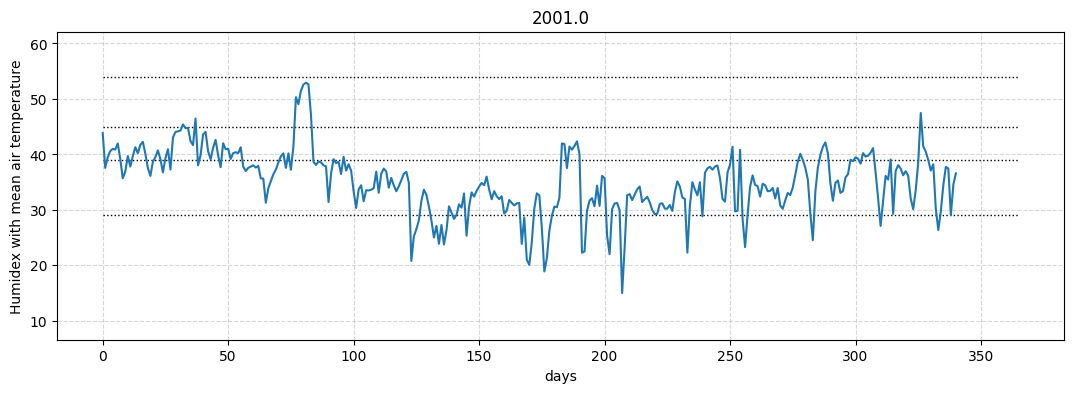

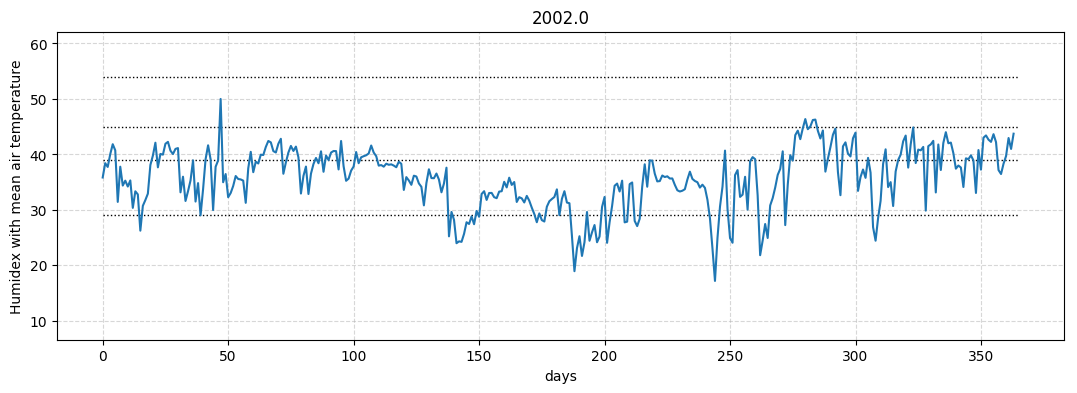

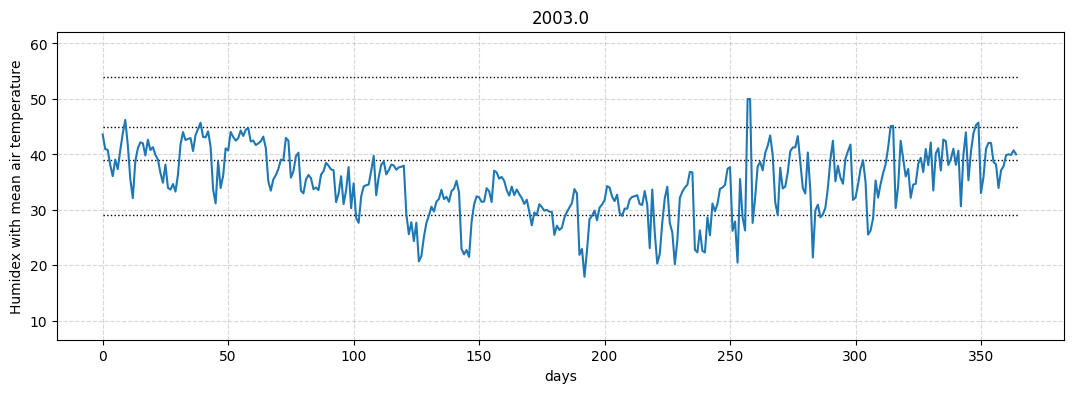

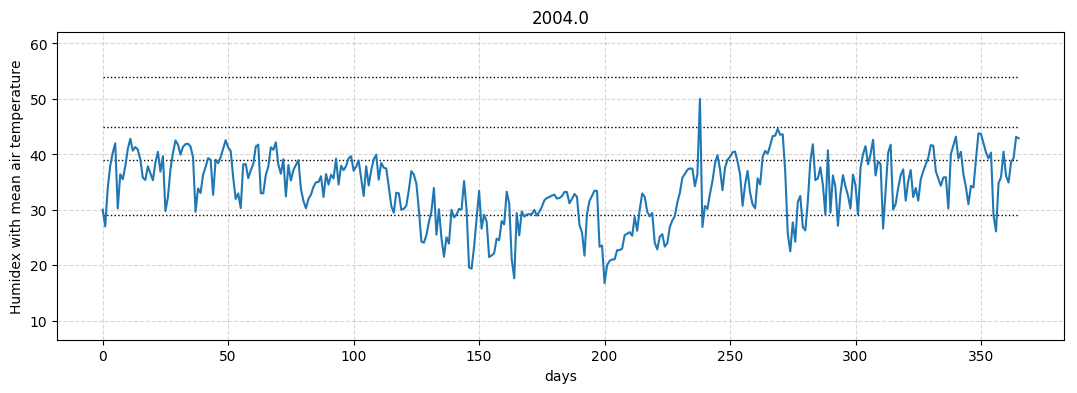

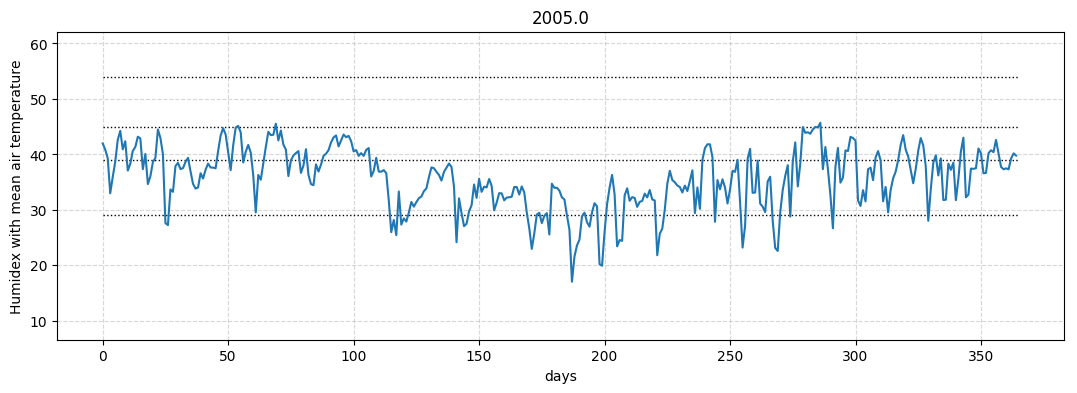

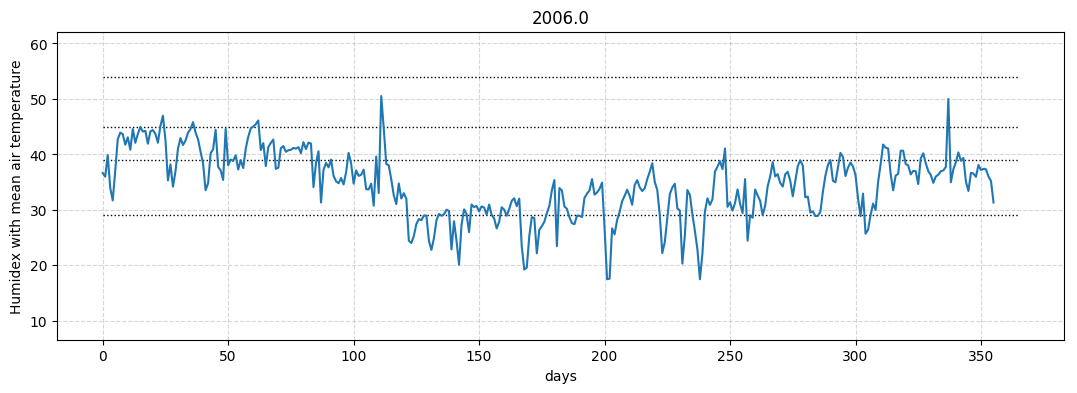

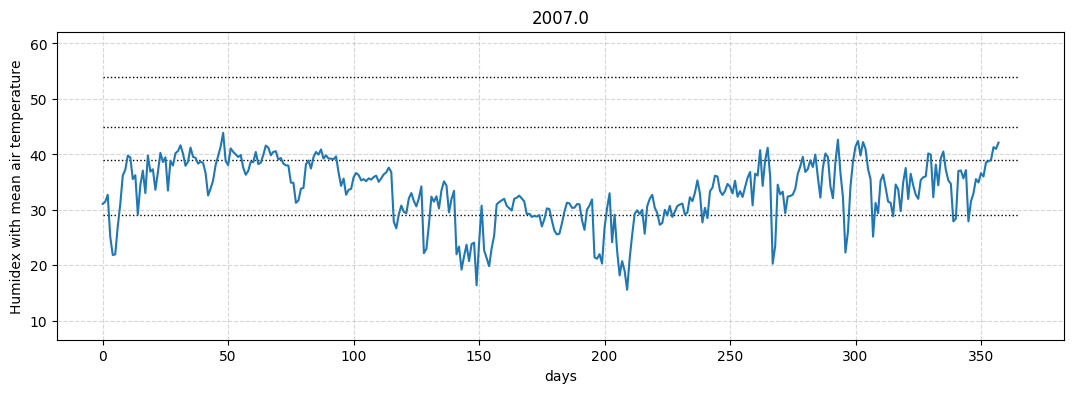

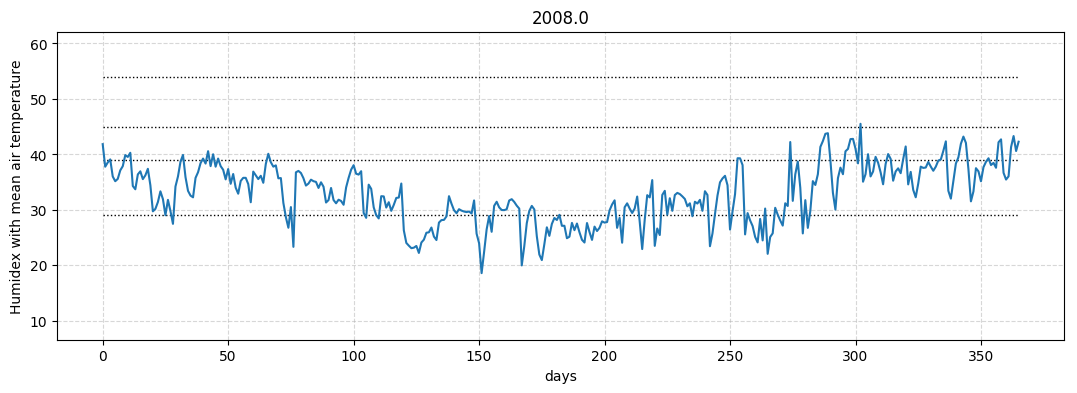

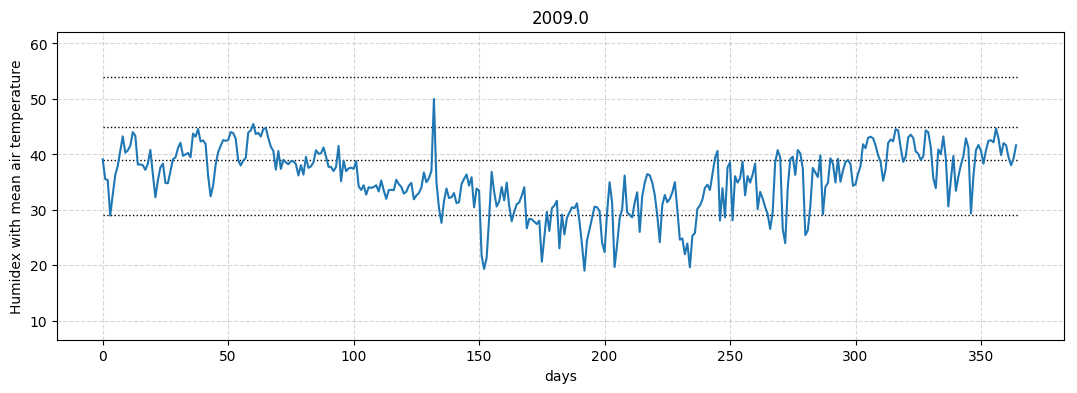

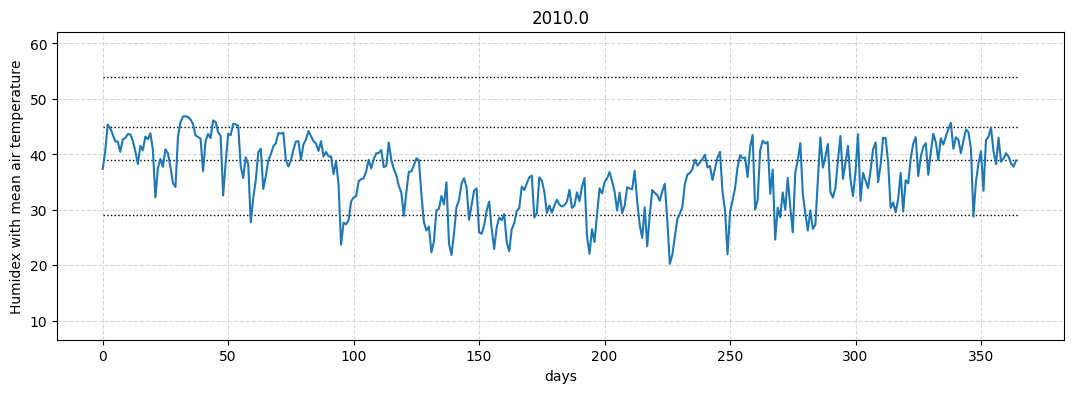

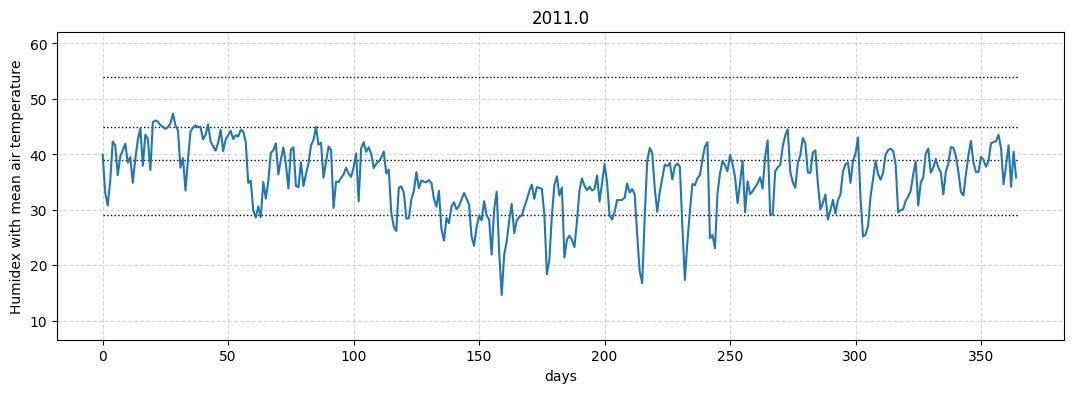

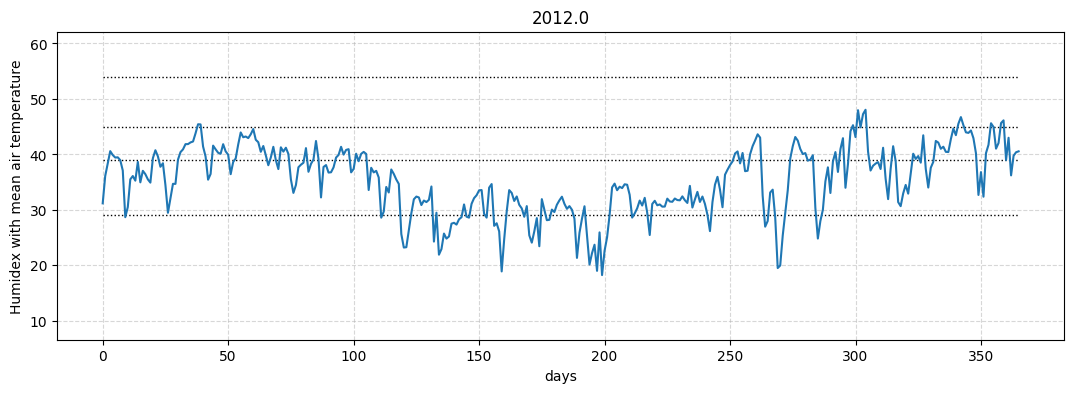

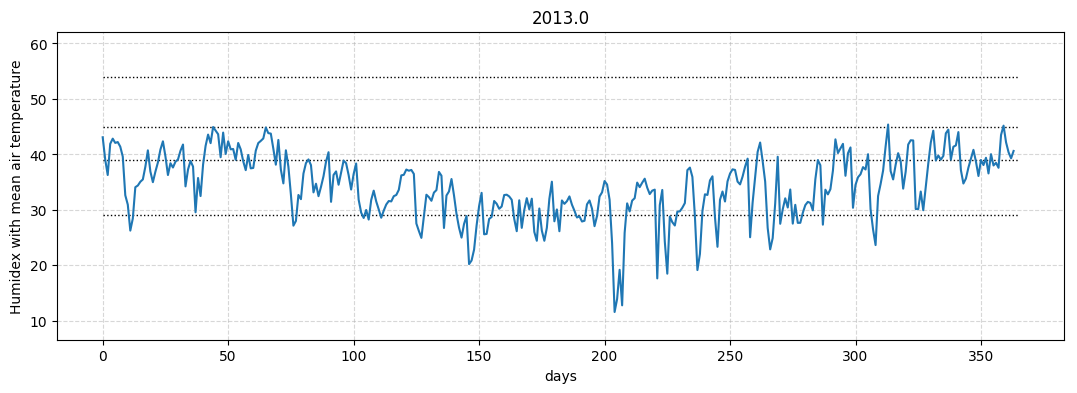

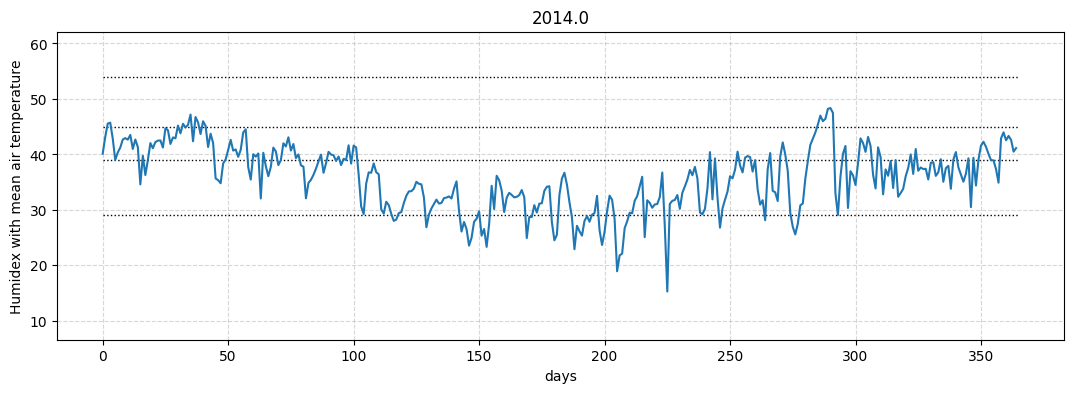

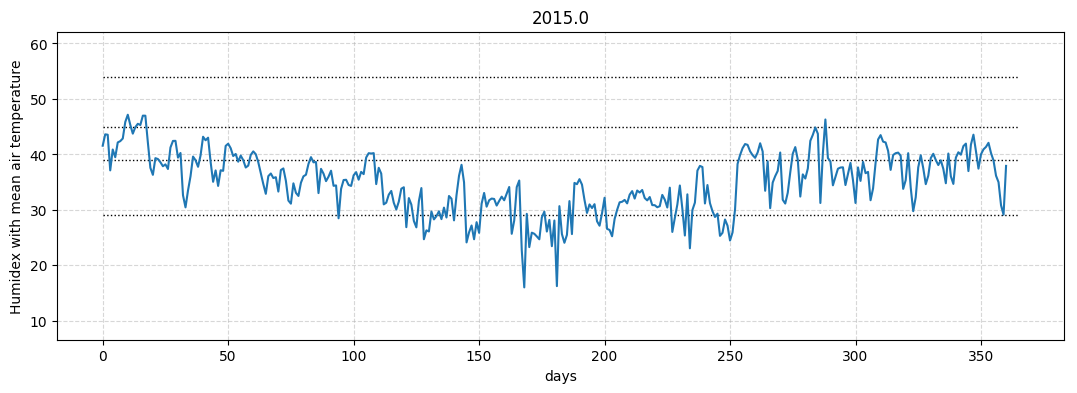

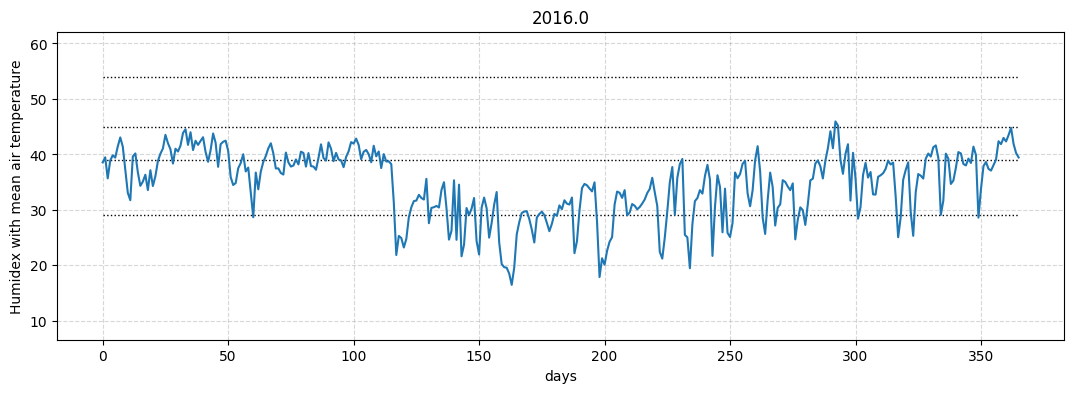

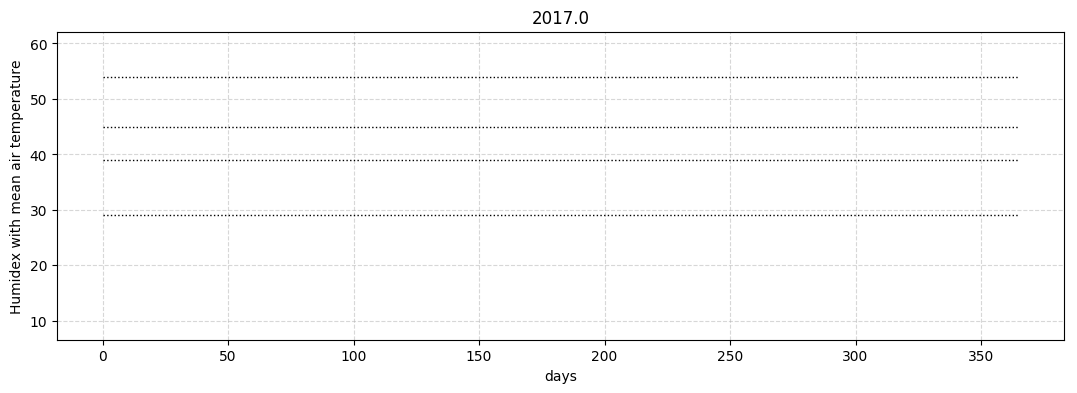

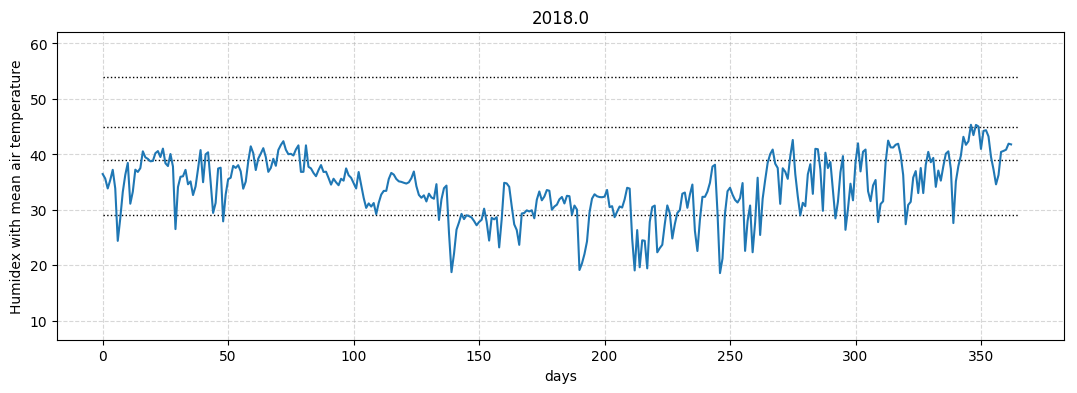

In [78]:
var1 = 'h_max'


data.loc[data[var1] > 60 , var1] = 50

min_y_value = data[var1].min() - 5
max_y_value = data[var1].max() + 5


for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.plot(np.arange(data_2plot.shape[0]),data_2plot[var1])
    
    plt.hlines(y=29,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=39,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=45,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=54,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    
    plt.xlabel('days')
    plt.ylabel('Humidex with mean air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
#     plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

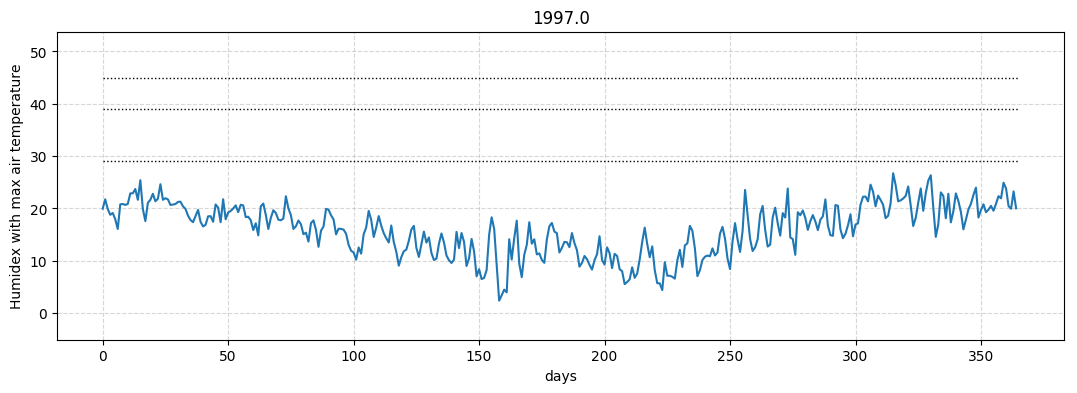

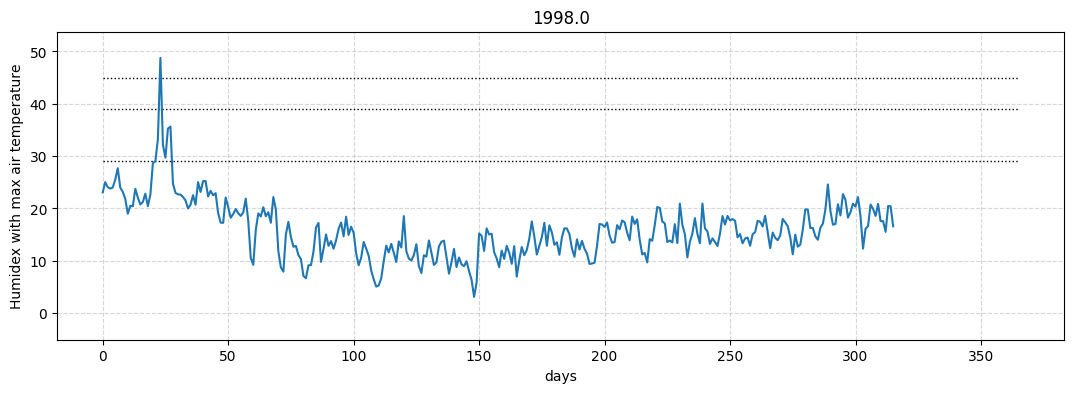

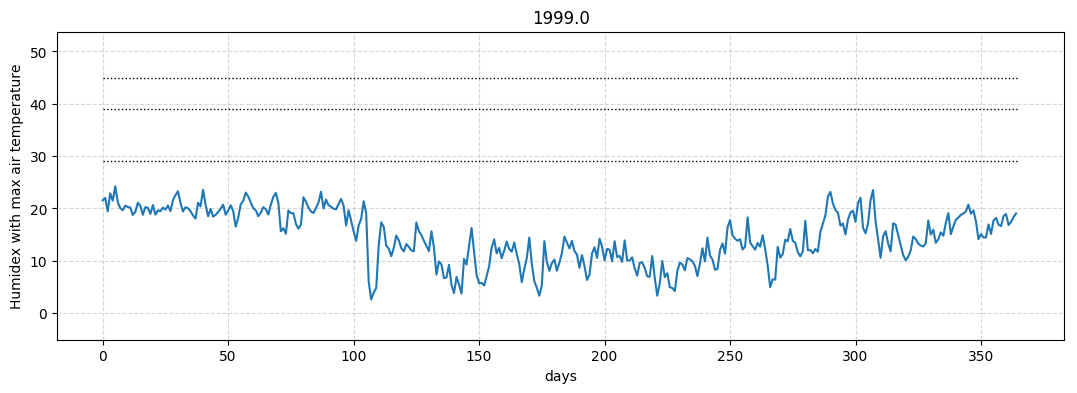

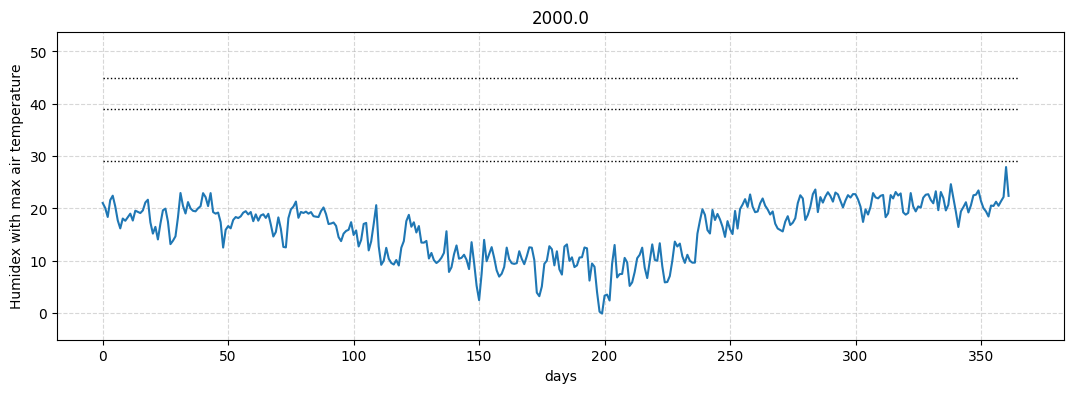

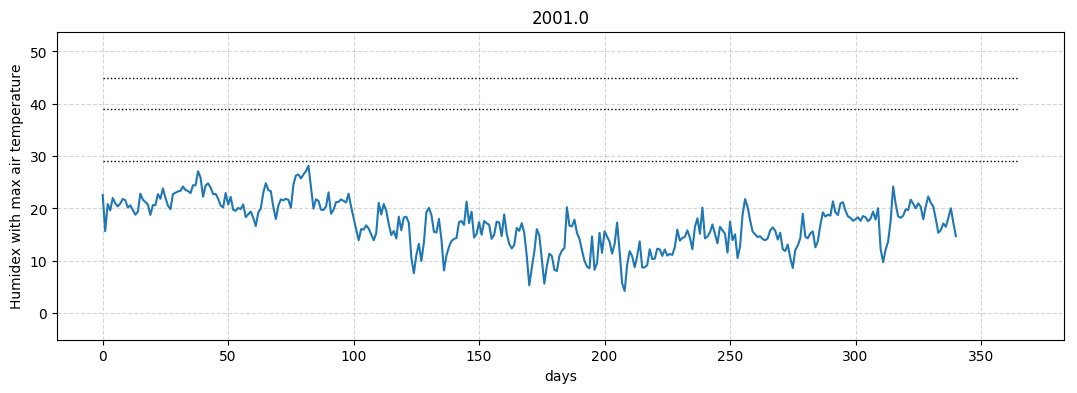

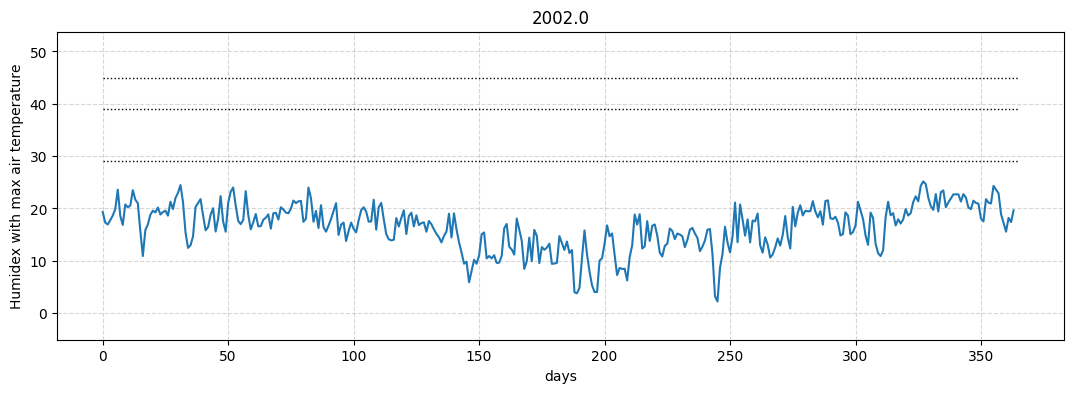

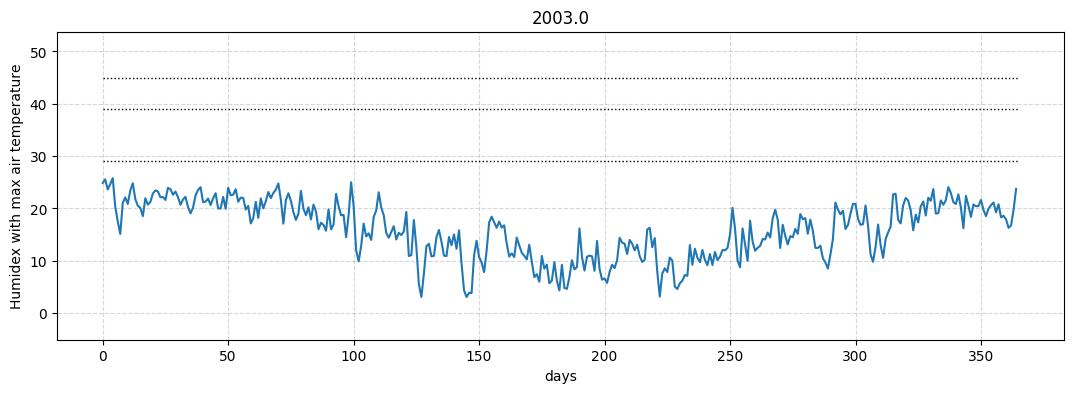

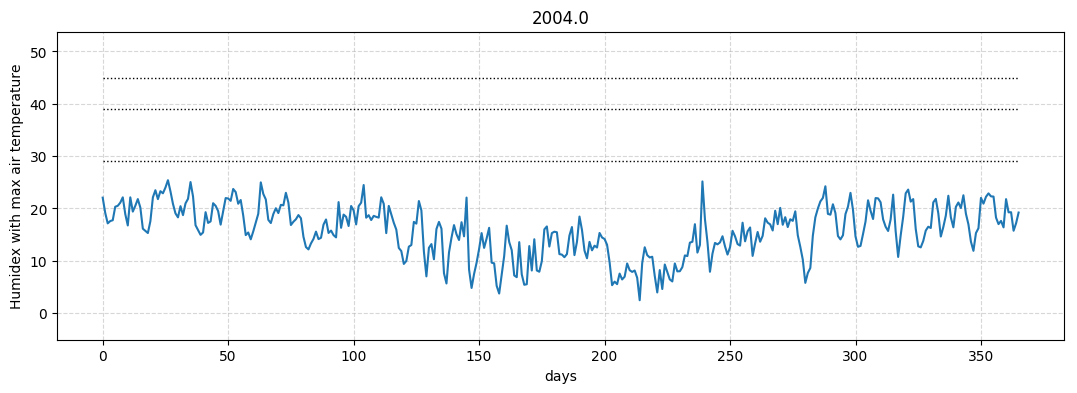

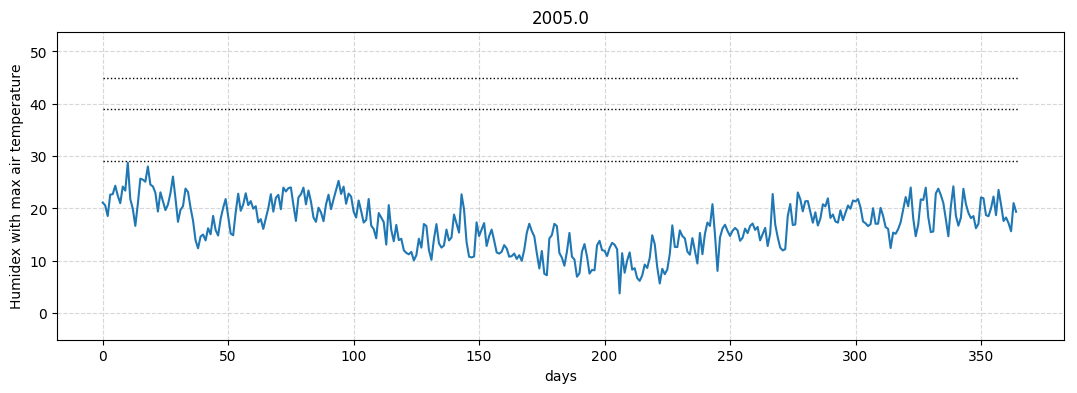

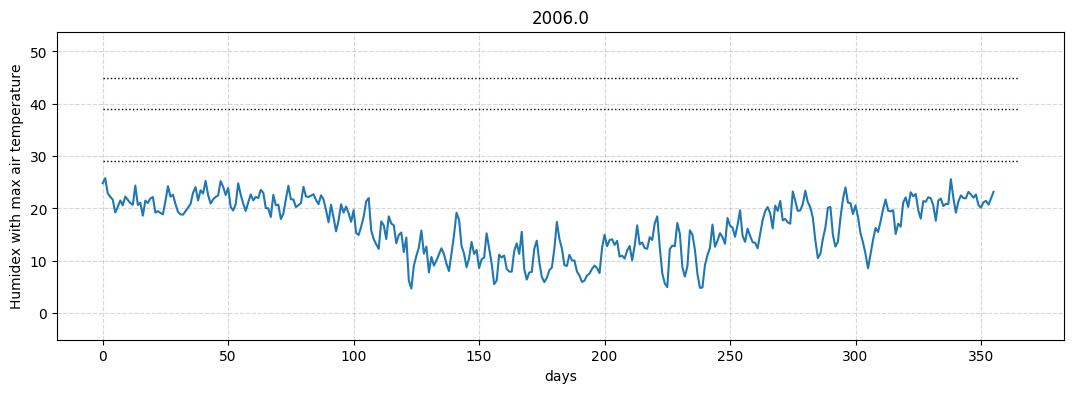

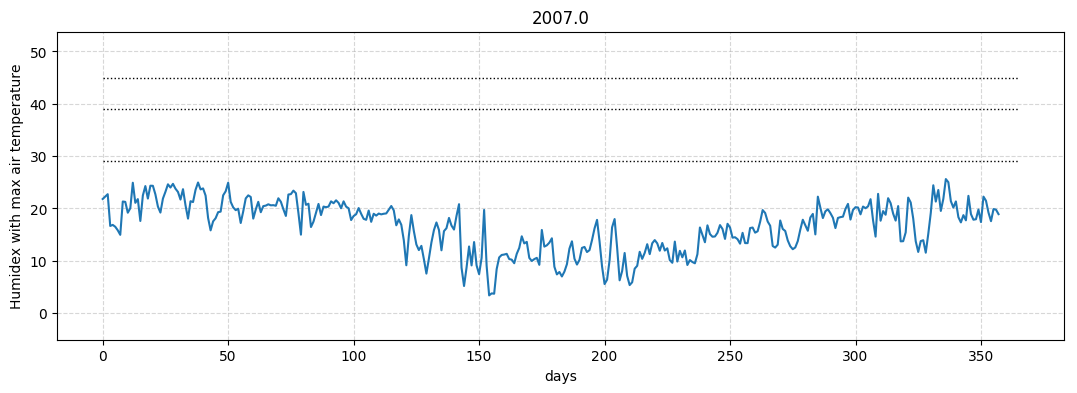

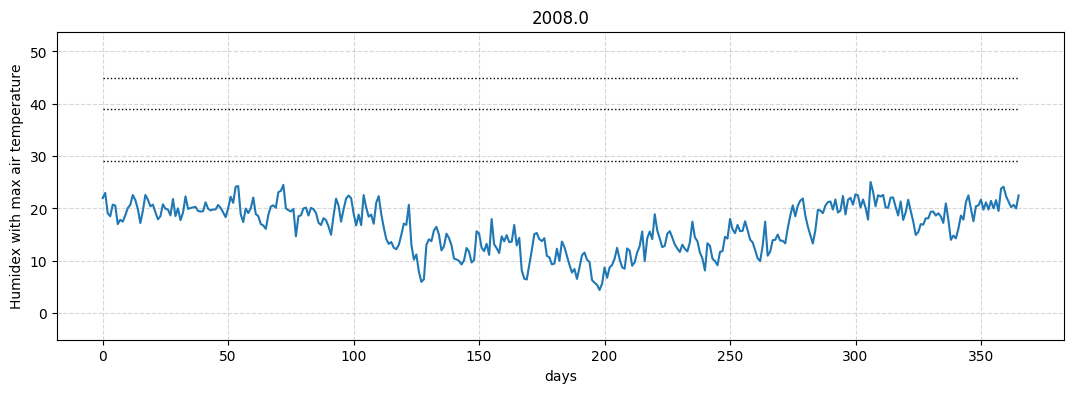

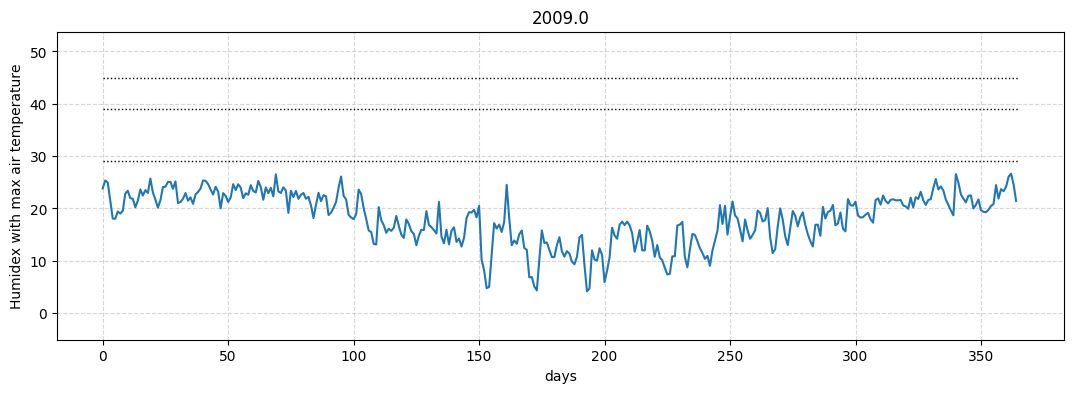

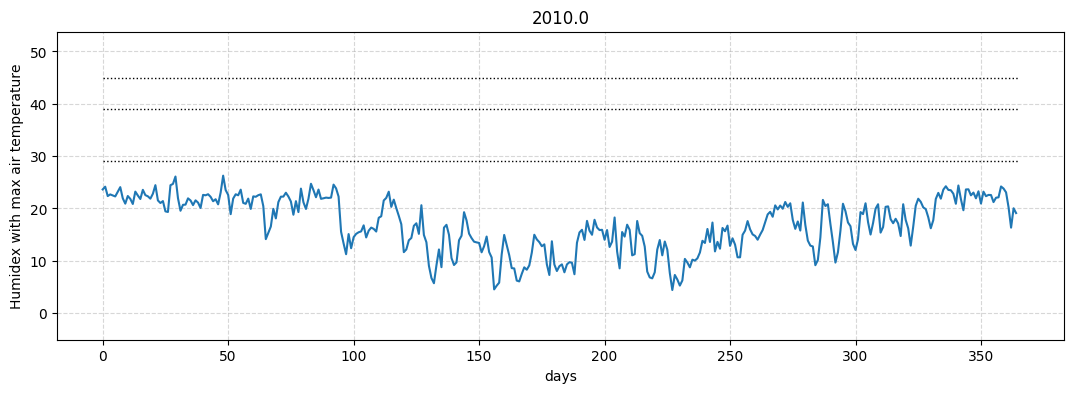

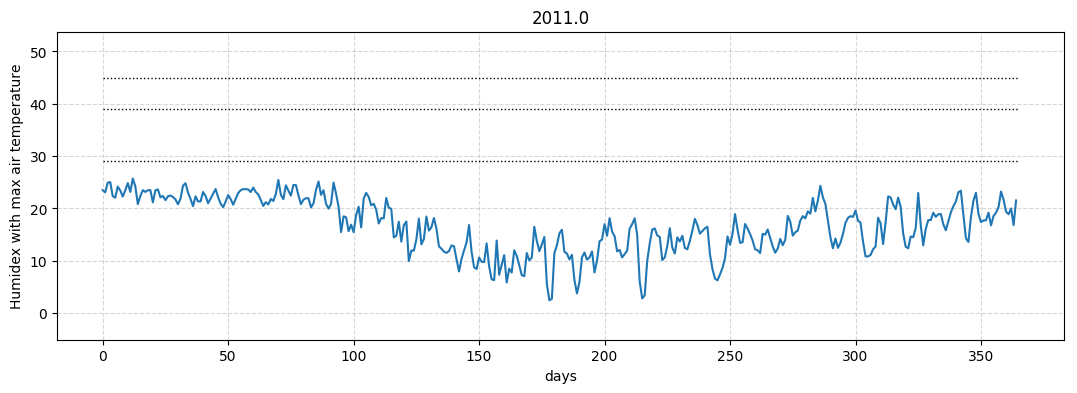

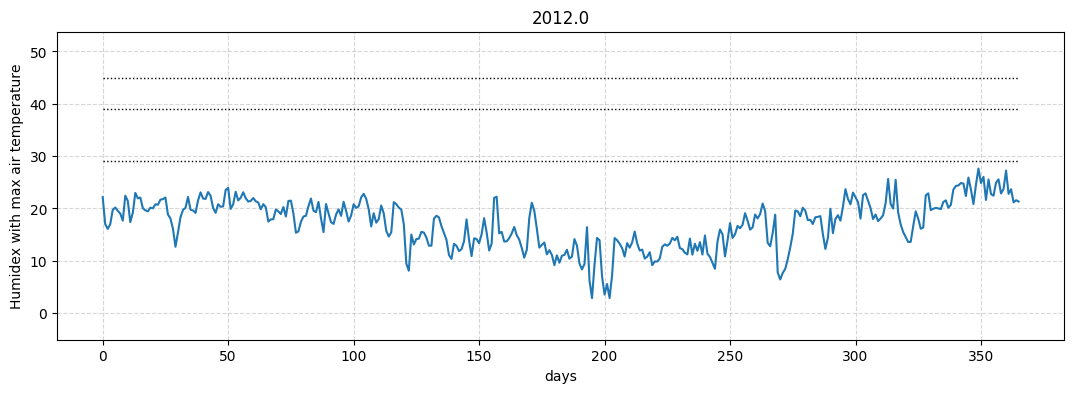

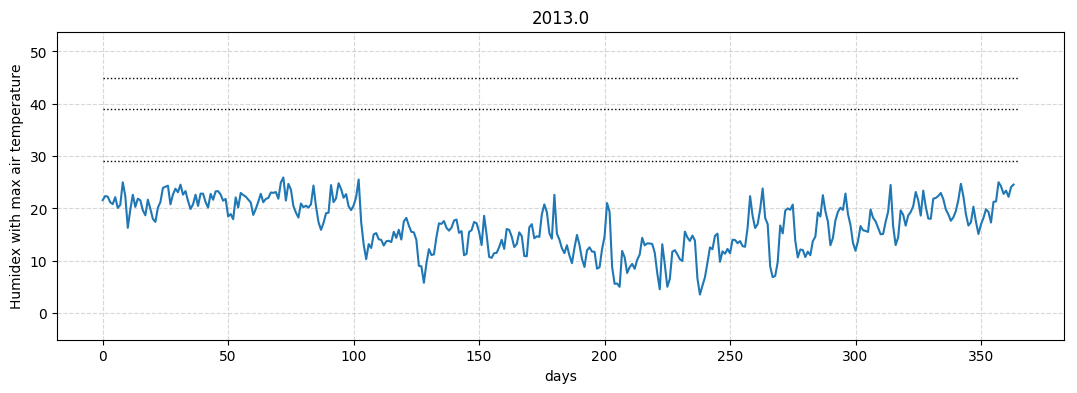

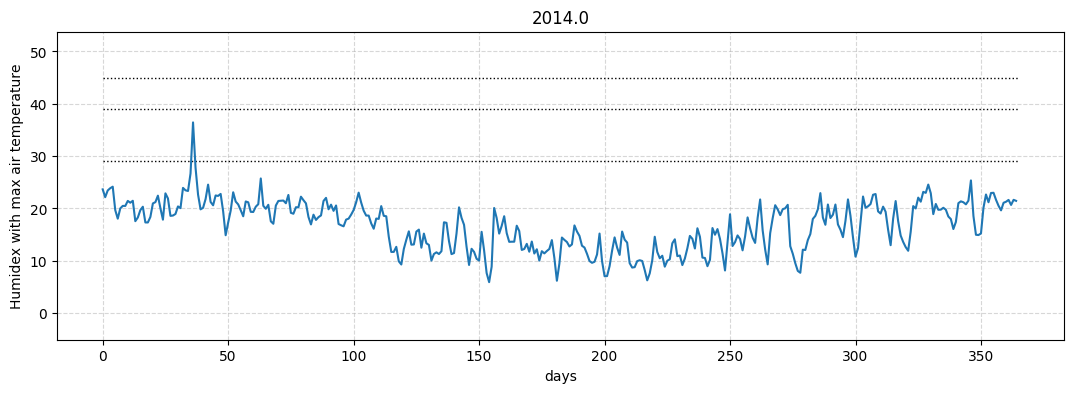

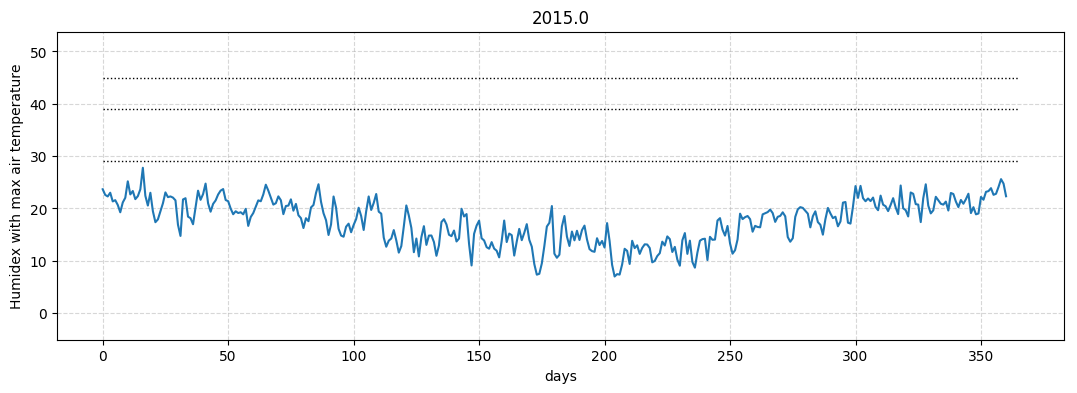

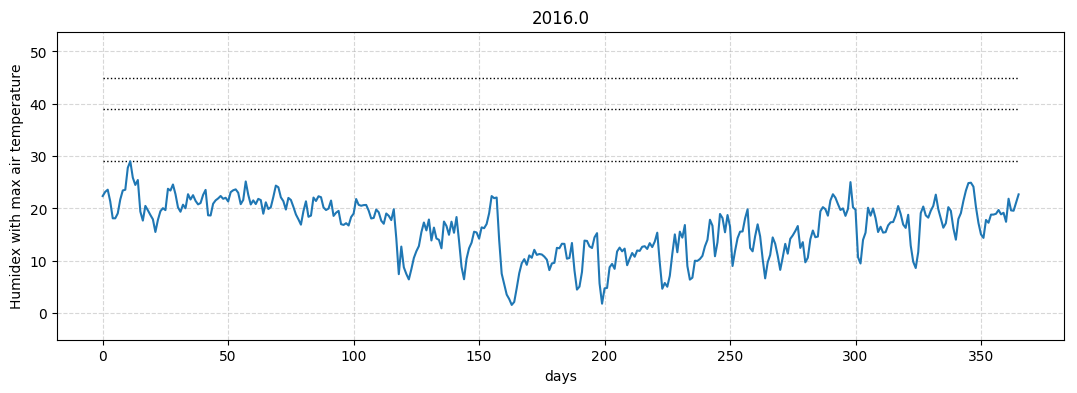

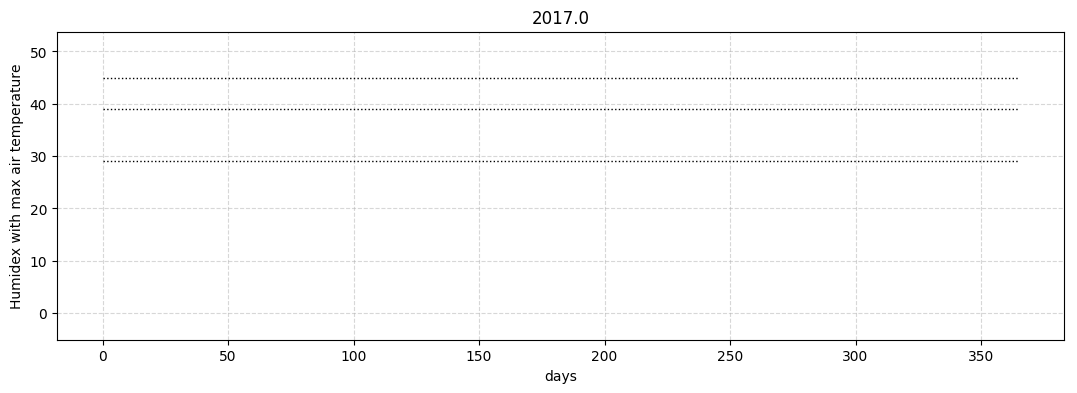

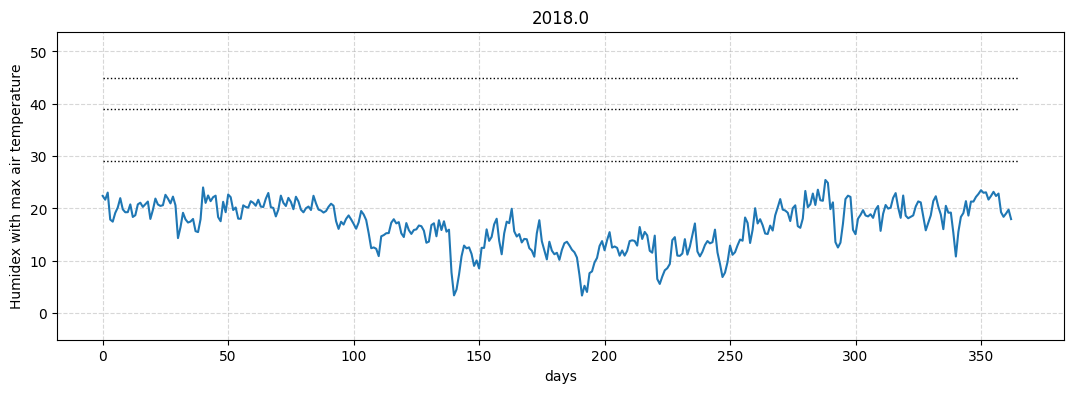

In [79]:
var1 = 'h_min'


data.loc[data[var1] > 60 , var1] = 50

min_y_value = data[var1].min() - 5
max_y_value = data[var1].max() + 5


for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.plot(np.arange(data_2plot.shape[0]),data_2plot[var1])
    
    plt.hlines(y=29,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=39,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=45,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=54,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    
    plt.xlabel('days')
    plt.ylabel('Humidex with max air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
#     plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

In [80]:
data_2plot[data_2plot[var1] >=50][['MIN_N_AIRMTR_PCT10','MIN_N_AIRTMP_MED10','MAX_N_AIRTMP_MED10','h_min','td_min']].head()

Empty DataFrame
Columns: [MIN_N_AIRMTR_PCT10, MIN_N_AIRTMP_MED10, MAX_N_AIRTMP_MED10, h_min, td_min]
Index: []

Looking to humidex using tmax as t it seems to get some days with some disconfort, but nothing very expressive

# 2 - Using magnus aproximation

With o.1% of precision when:

-30 < = T <= 35 and
0 <= UR <= 100

$T_{dp} = {c\gamma _m (T,UR) \over b - \gamma _m (T,UR)}$, where:

$ \gamma _m (T,UR)  =  ln({UR \over 100}exp((b - {T \over d})*({T \over c + T})))$  

In [81]:
a = 6.112
b = 18.678
c = 257.14
d = 234.5

def get_gamma(T,UR):
    t1 = b-T/d
    t2 = T/(c+T)
    
    g = np.log((UR/100)*np.exp(t1*t2))
    return g

def get_td2(T,UR):
    g = get_gamma(T,UR)
    
    h = c*g/(b - g)
    
    return h

In [82]:
data['td_min2'] = get_td2(data[temp_vars[0]],data['MIN_N_AIRMTR_PCT10'])
data['td_max2'] = get_td2(data[temp_vars[2]],data['MIN_N_AIRMTR_PCT10'])
data['td_mean2'] = get_td2(data[temp_vars[1]],data['MIN_N_AIRMTR_PCT10'])

In [83]:
# Getting humidex

data['h_min2'] = get_humidex(data[temp_vars[0]],data['td_min2'])
data['h_max2'] = get_humidex(data[temp_vars[2]],data['td_max2'])
data['h_mean2'] = get_humidex(data[temp_vars[1]],data['td_mean2'])

In [84]:
# data['h_max2']

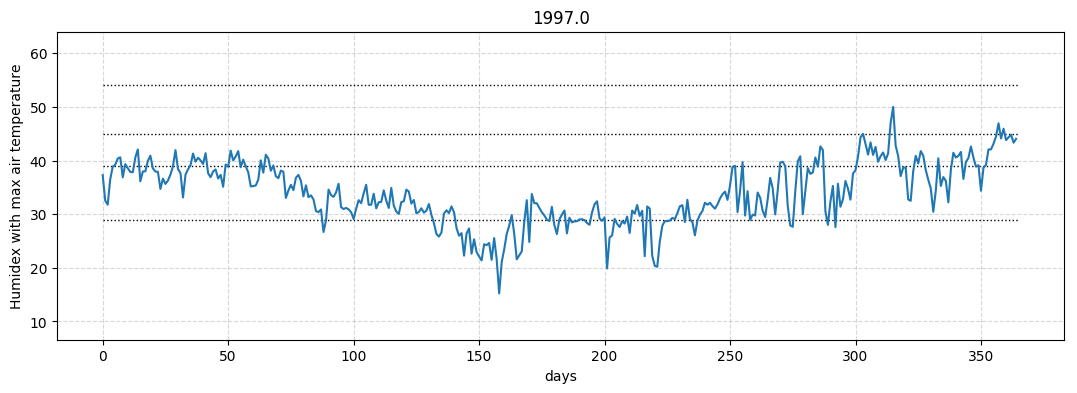

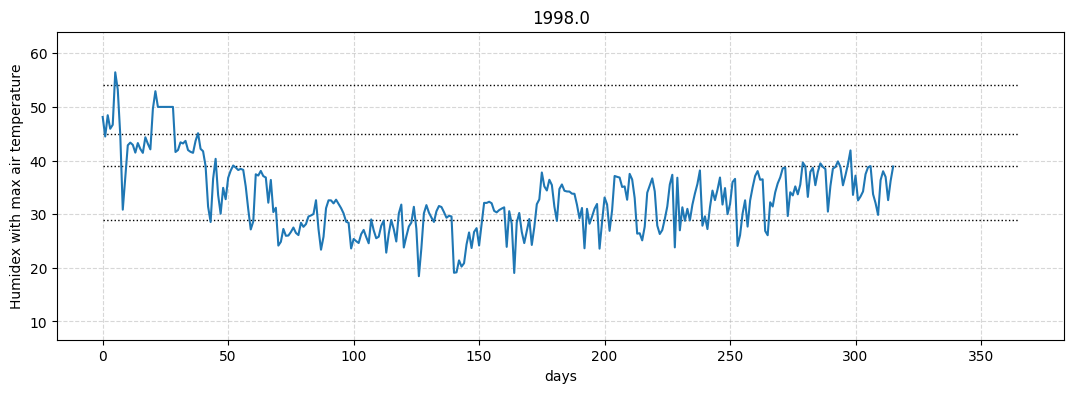

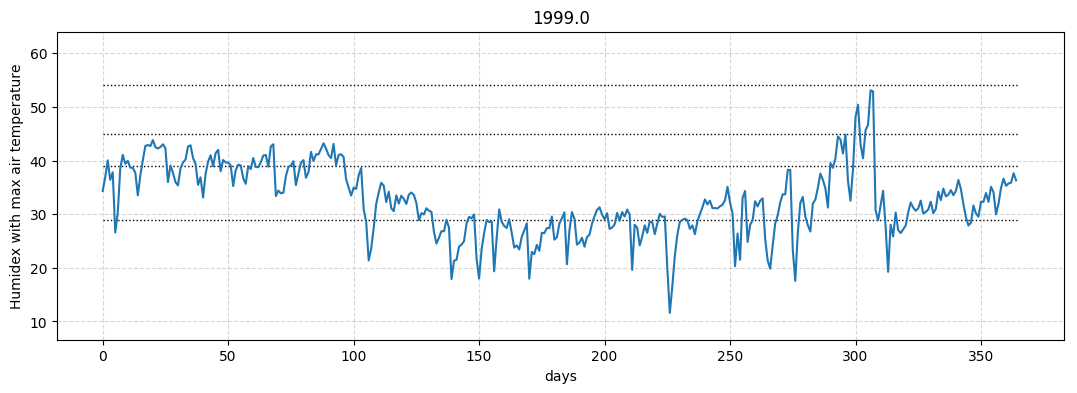

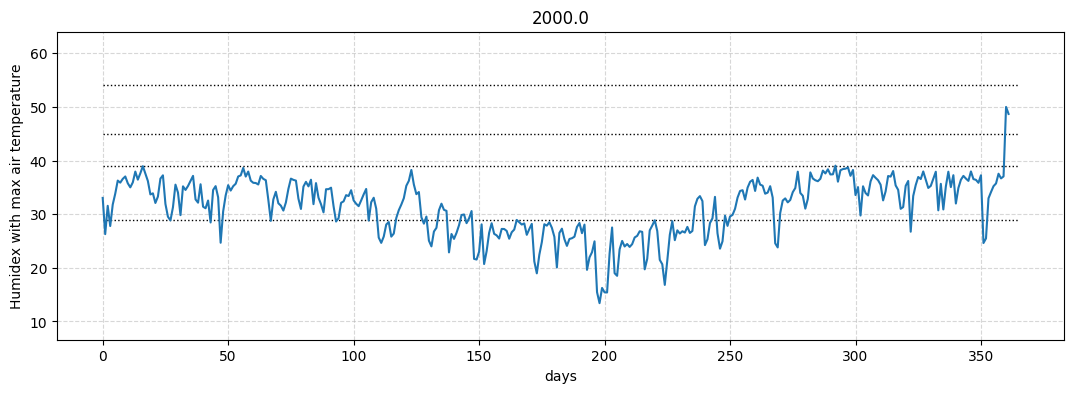

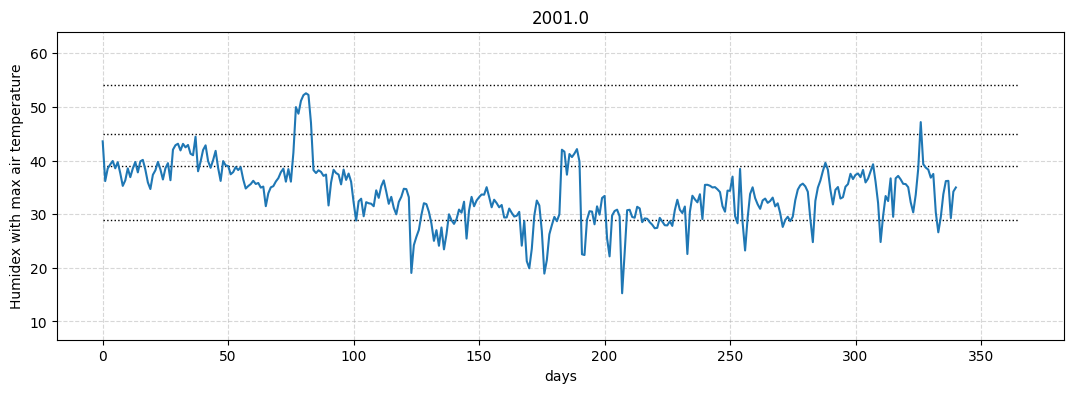

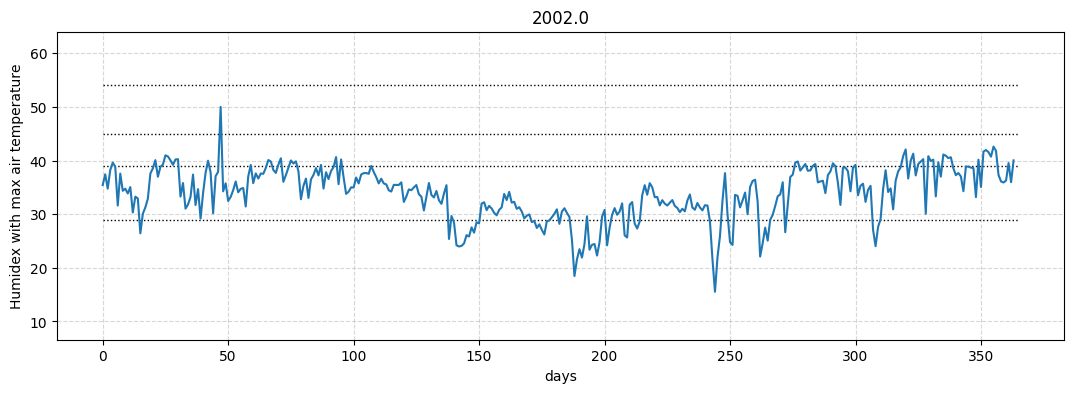

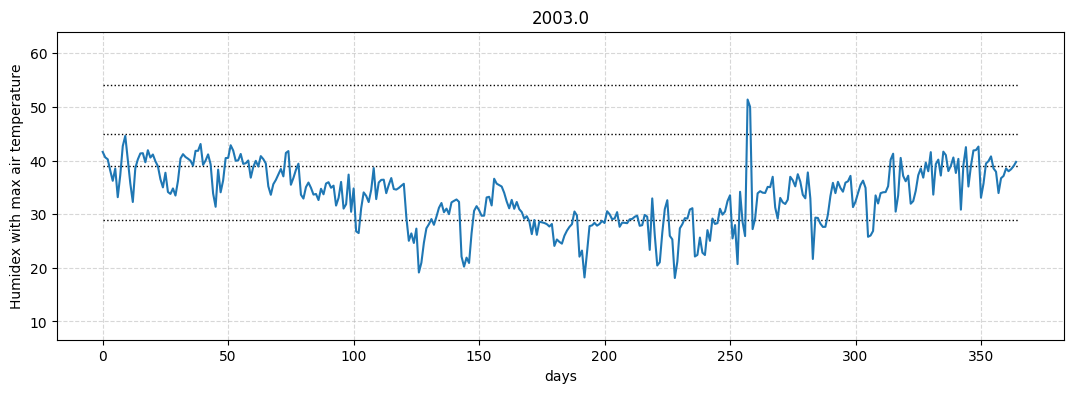

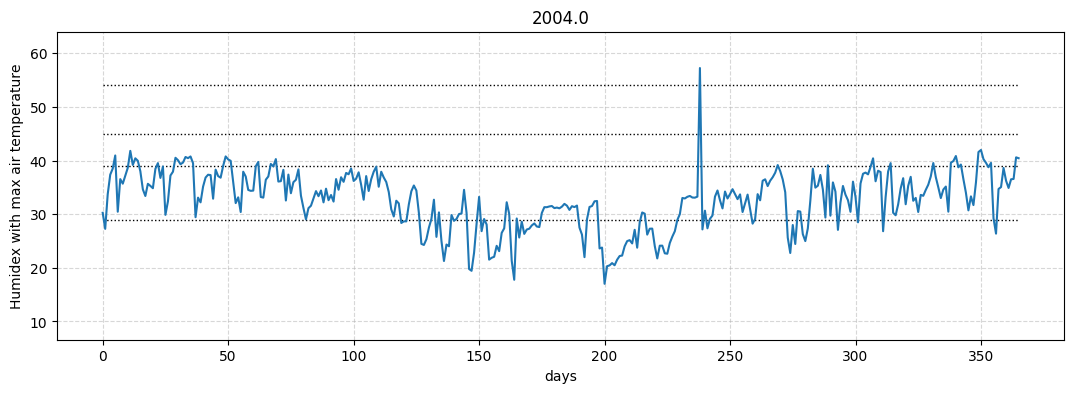

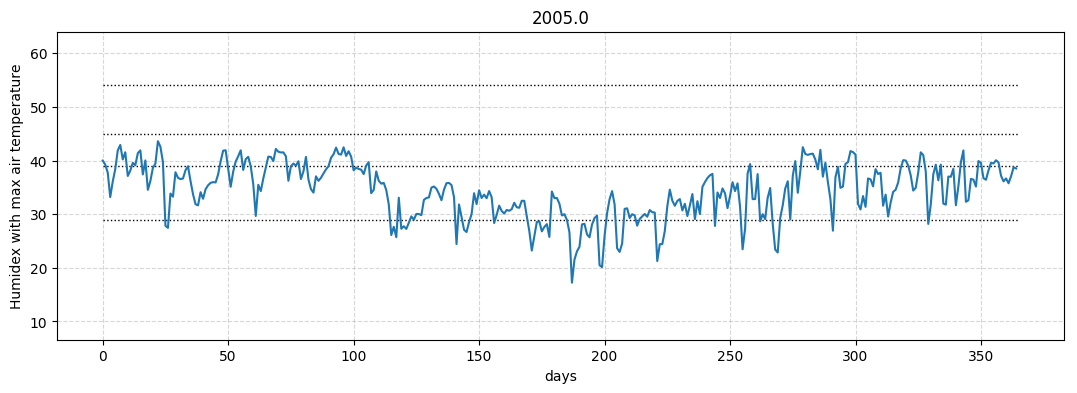

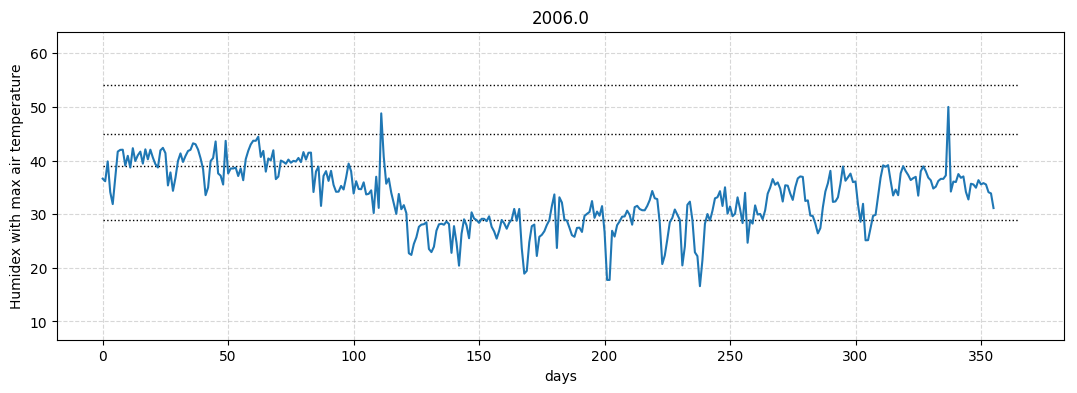

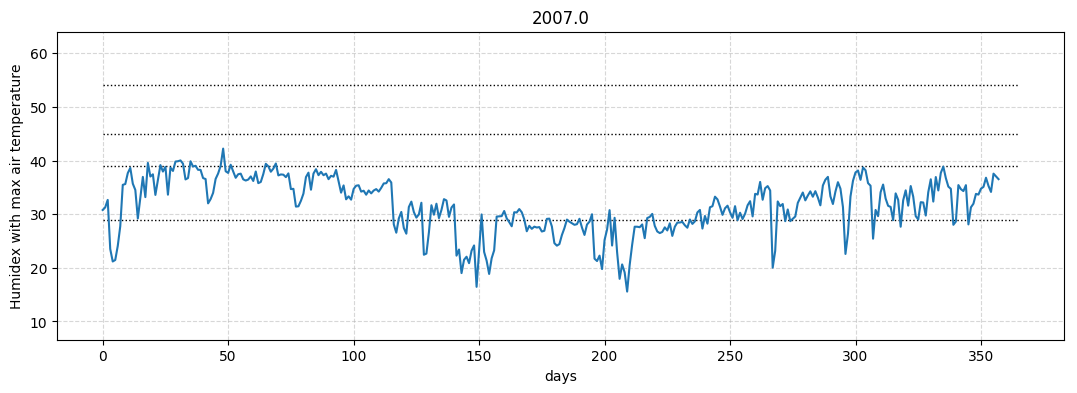

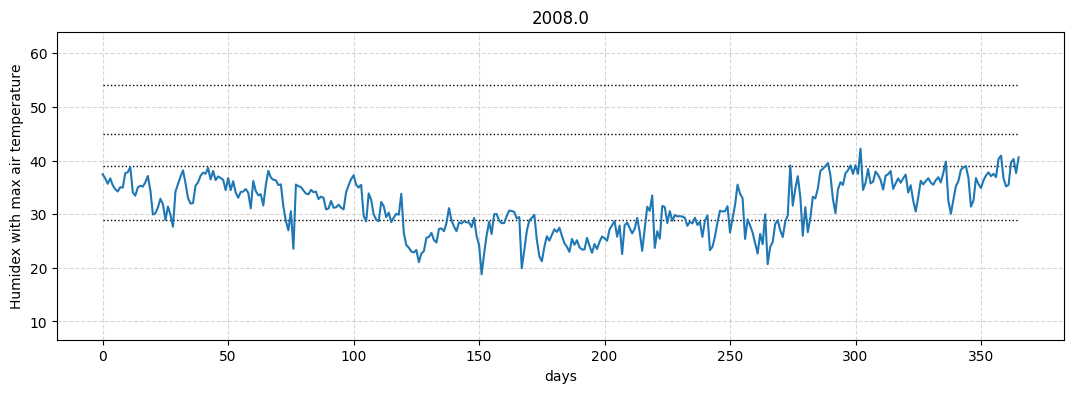

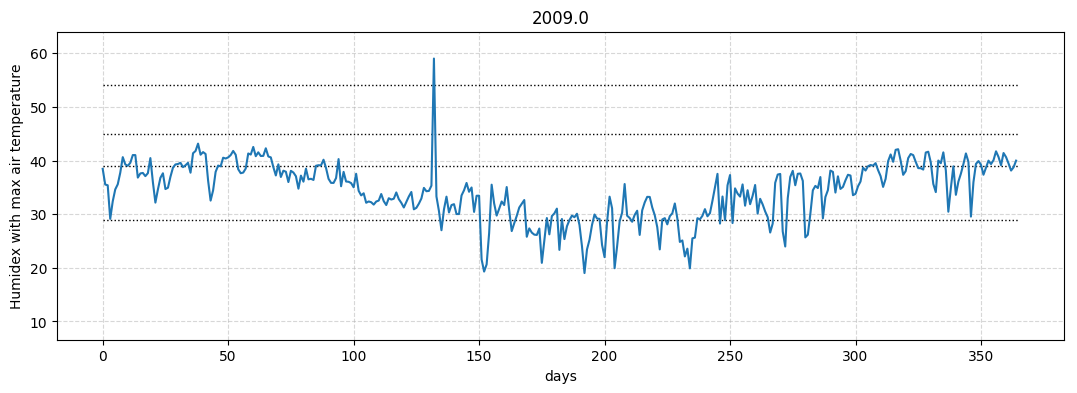

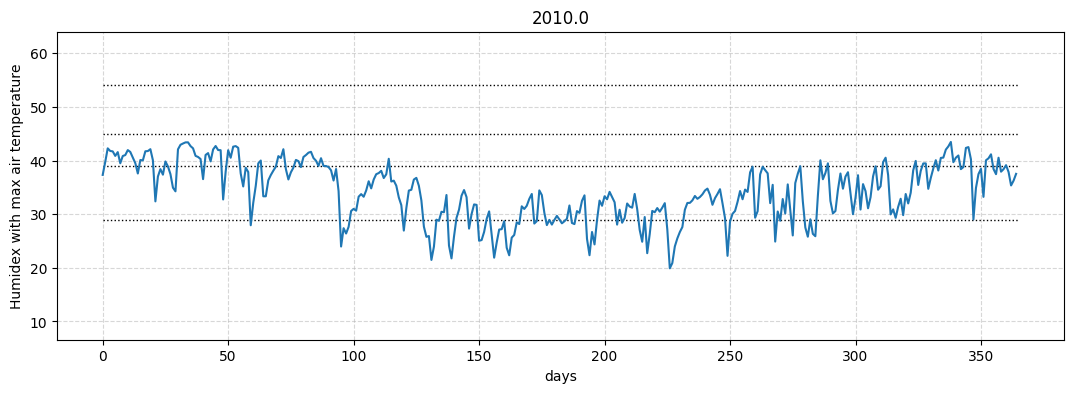

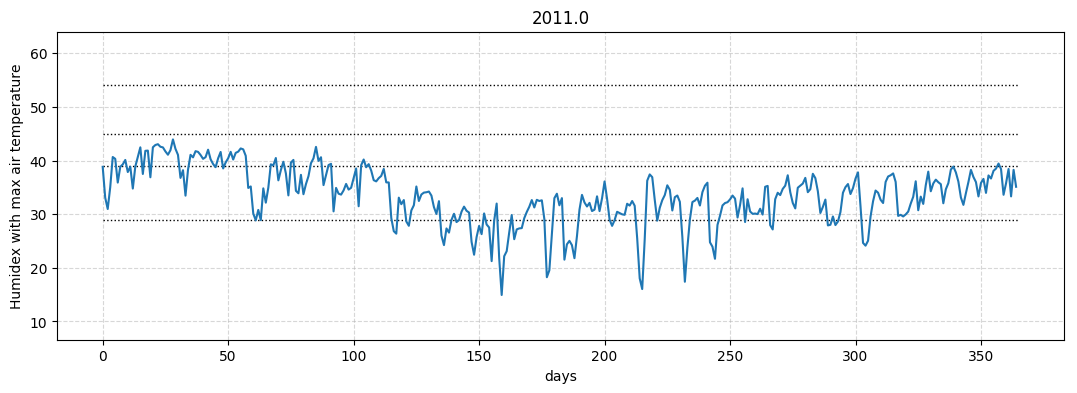

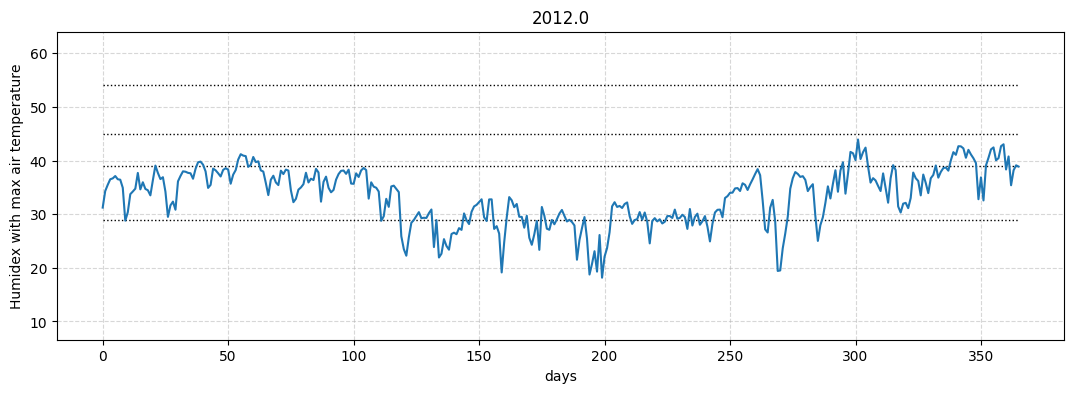

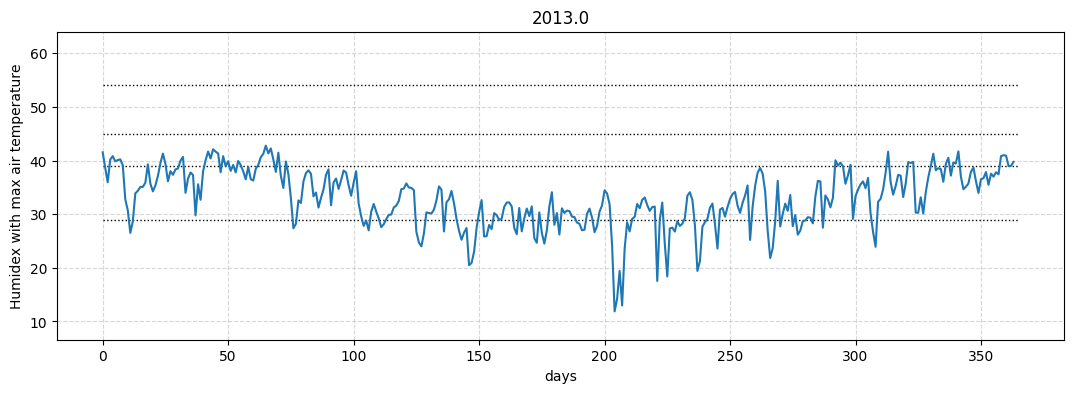

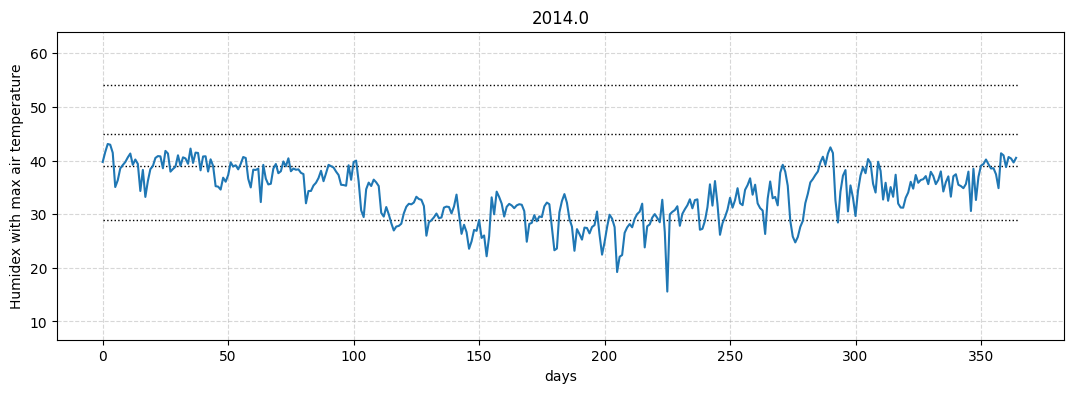

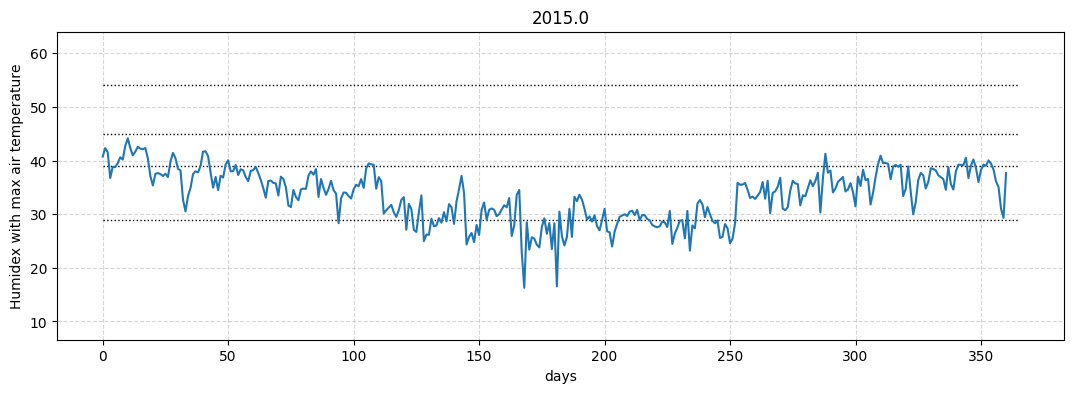

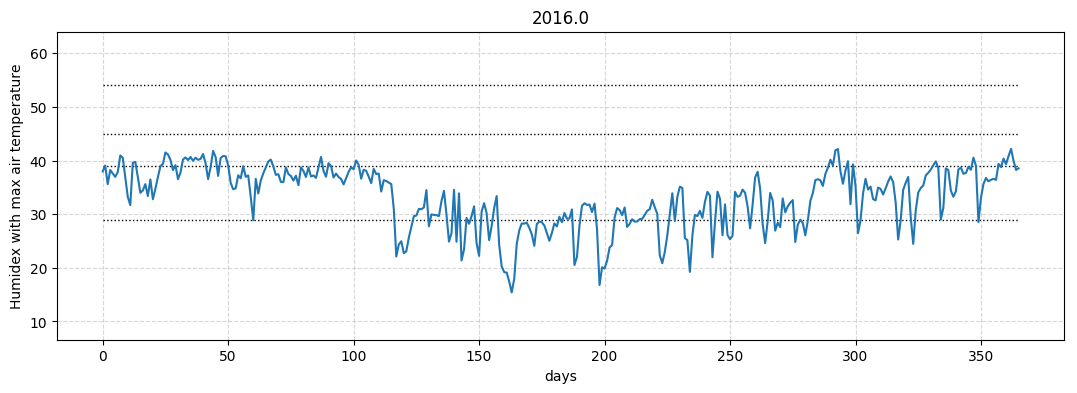

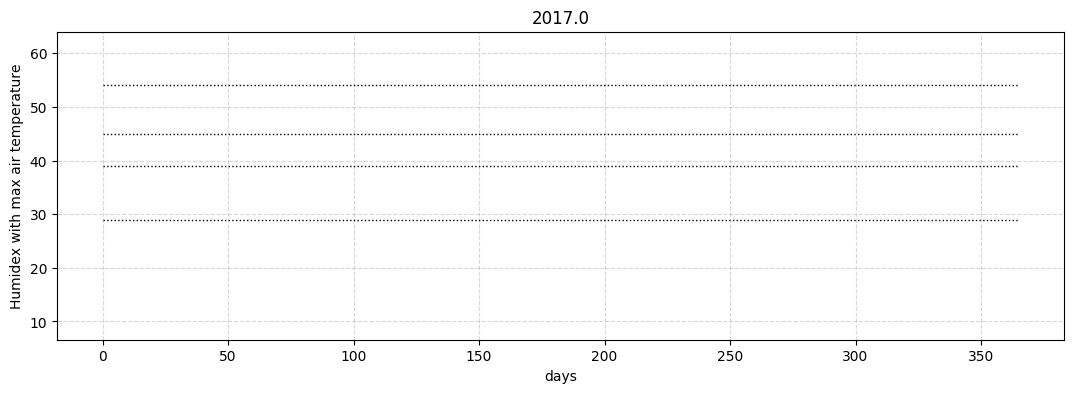

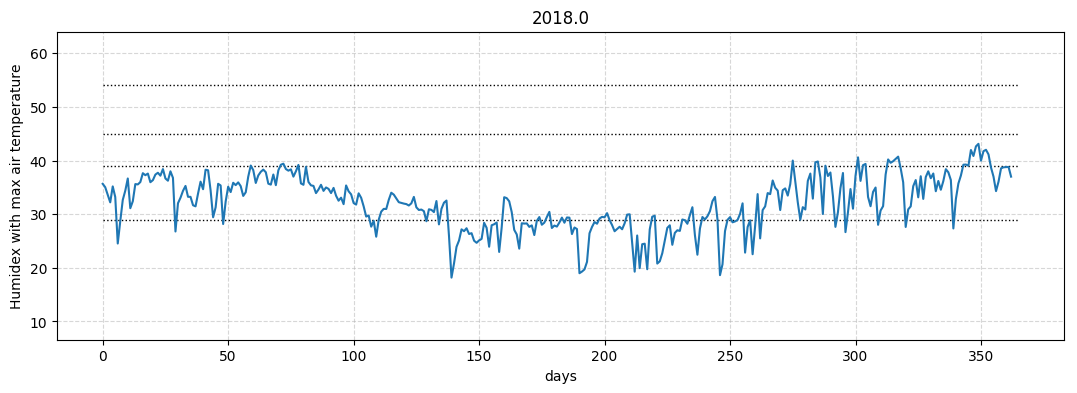

In [85]:
var1 = 'h_max2'

data.loc[data[var1] > 60 , var1] = 50

min_y_value = data[var1].min() - 5
max_y_value = data[var1].max() + 5


for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]
    
    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.plot(np.arange(data_2plot.shape[0]),data_2plot[var1])
    
    plt.hlines(y=29,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=39,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=45,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=54,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    
    plt.xlabel('days')
    plt.ylabel('Humidex with max air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
#     plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

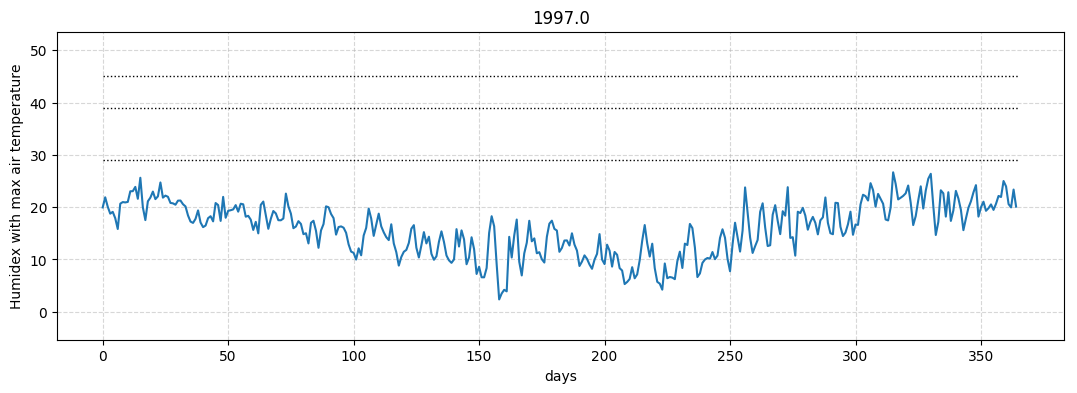

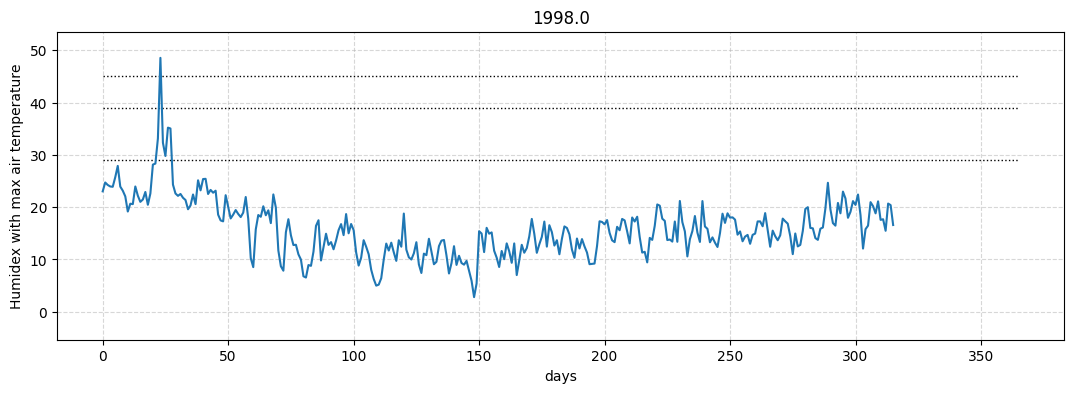

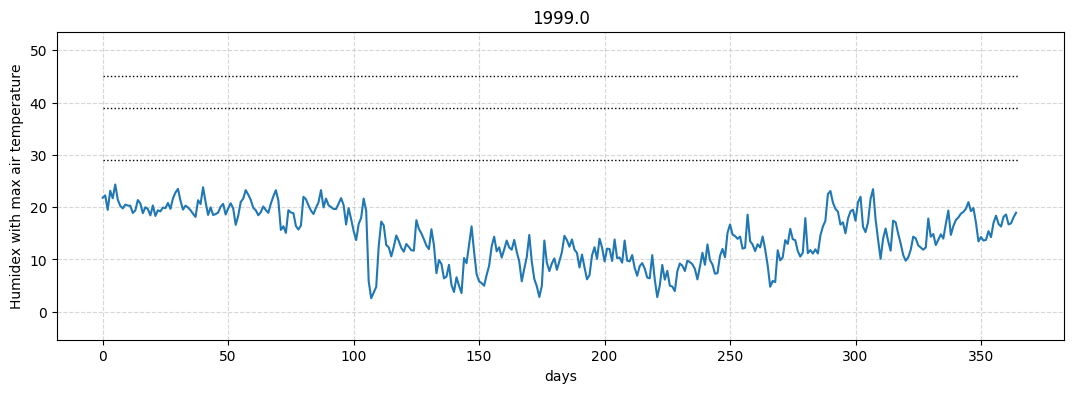

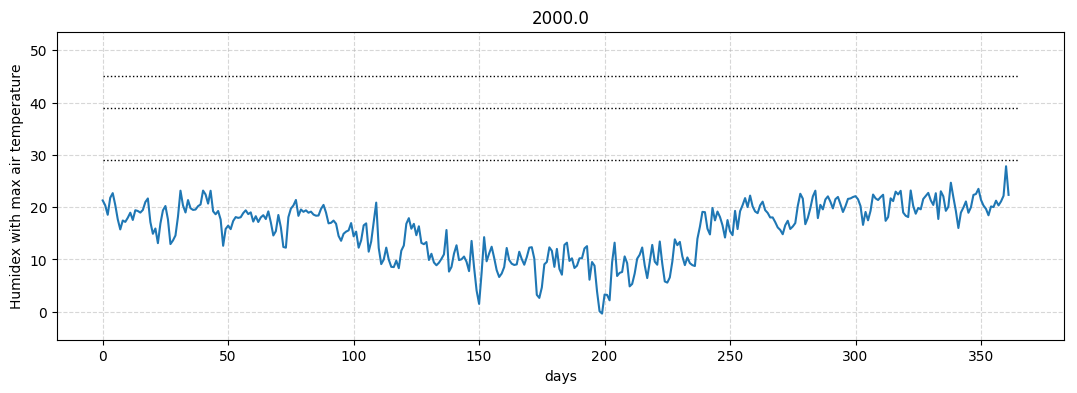

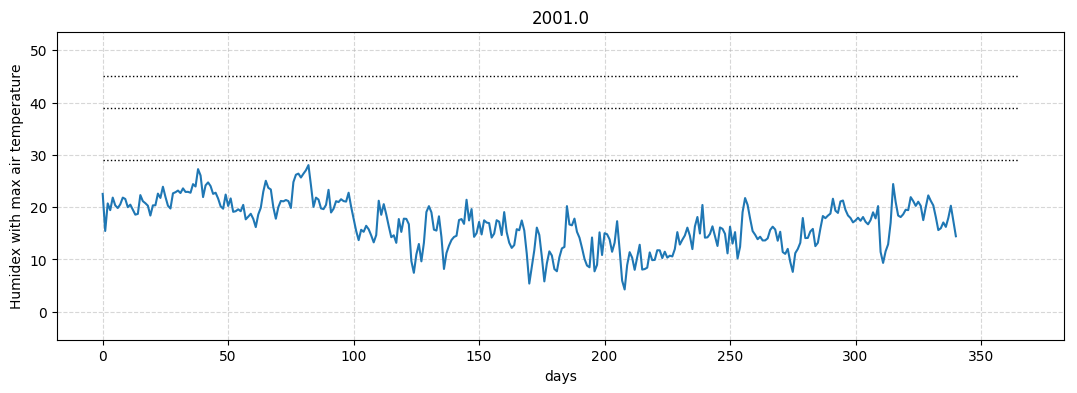

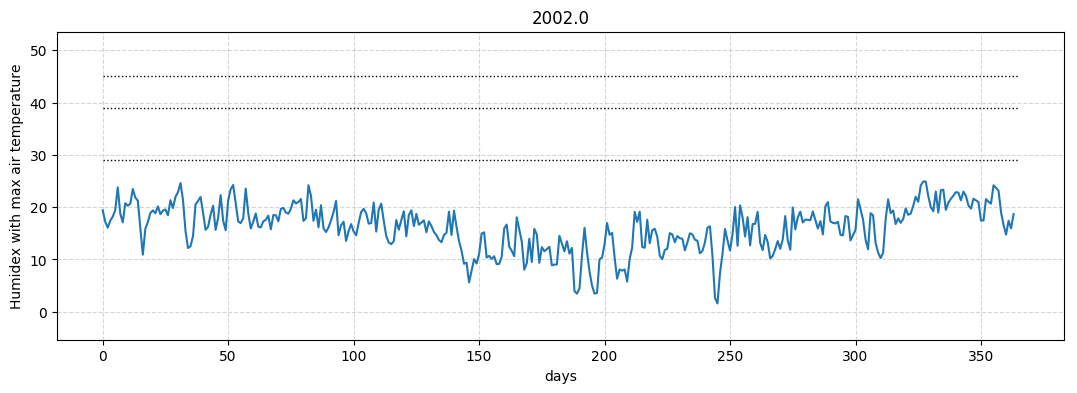

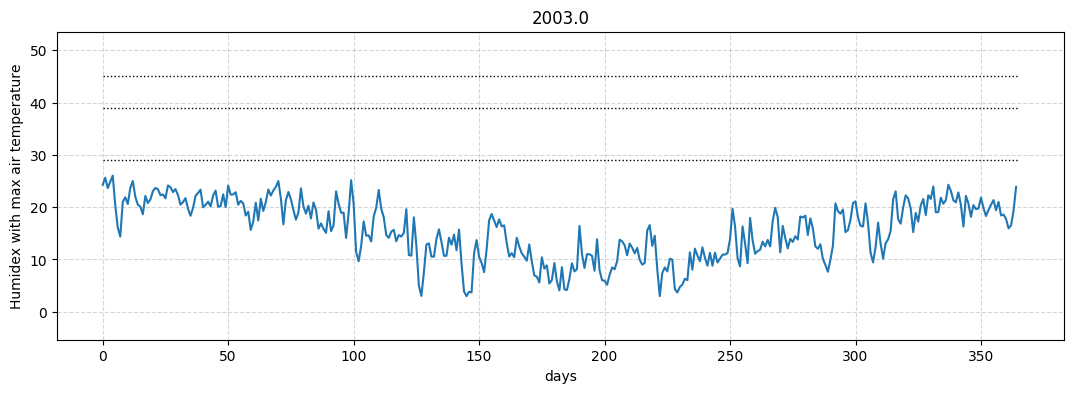

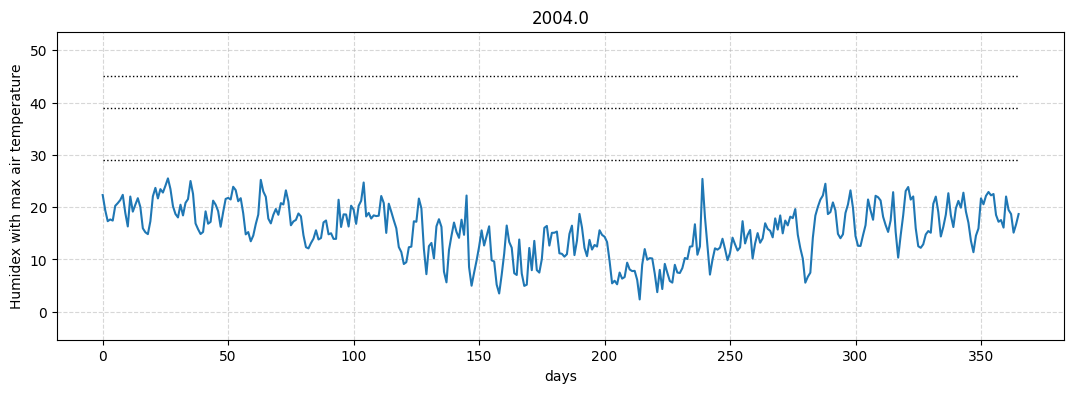

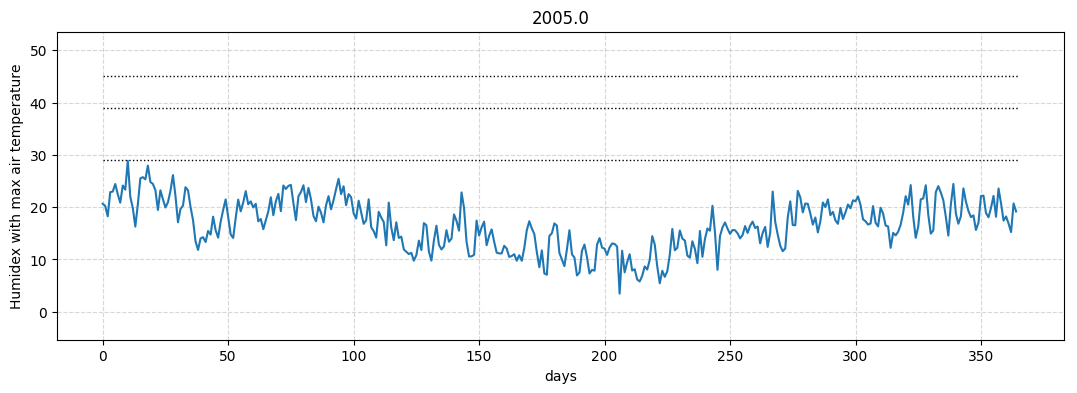

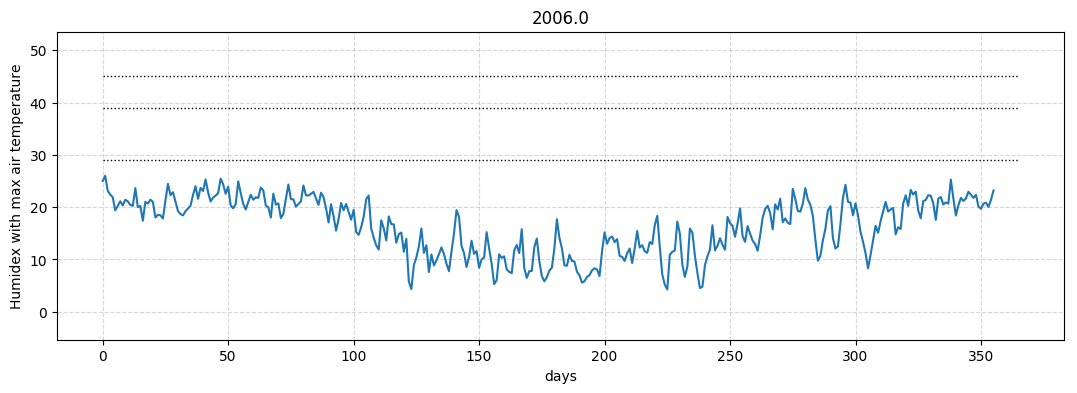

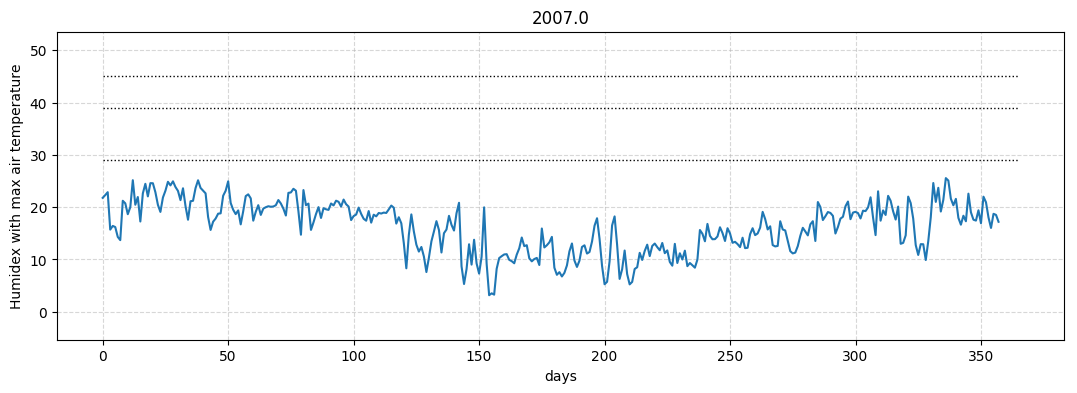

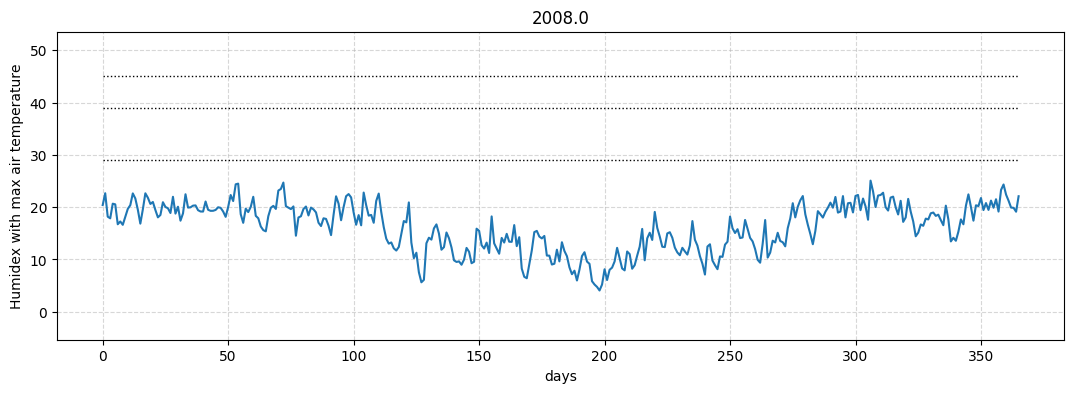

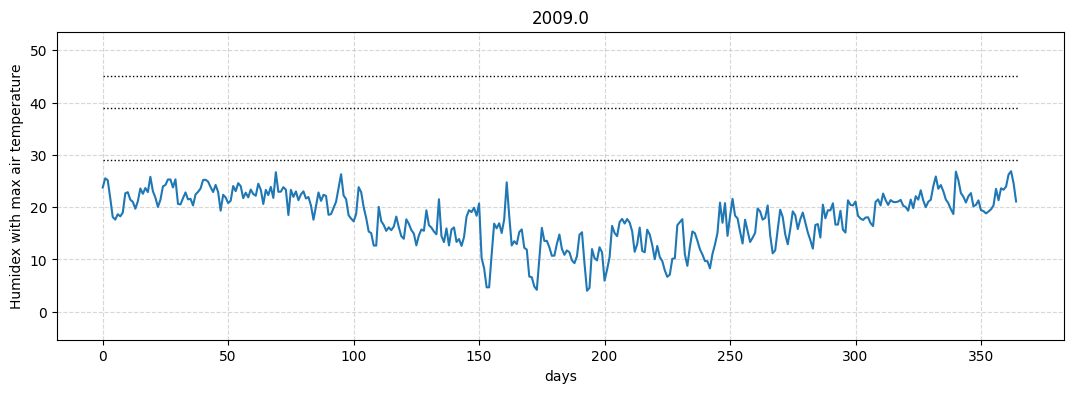

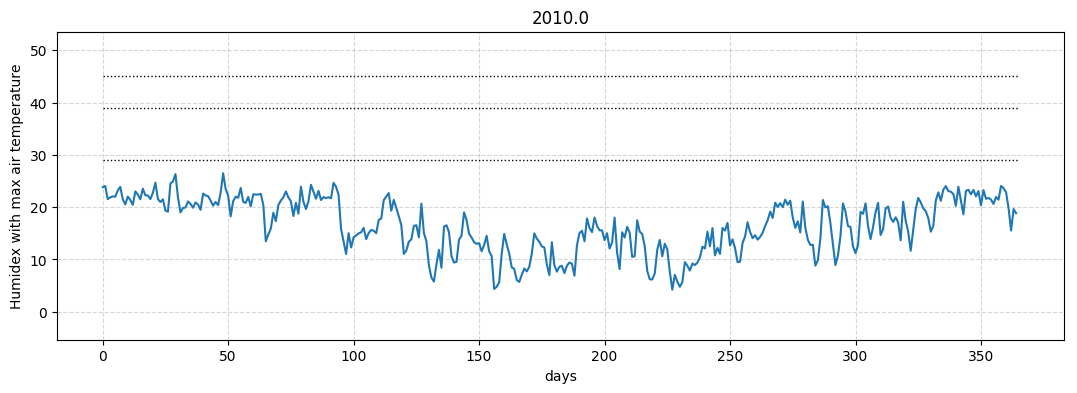

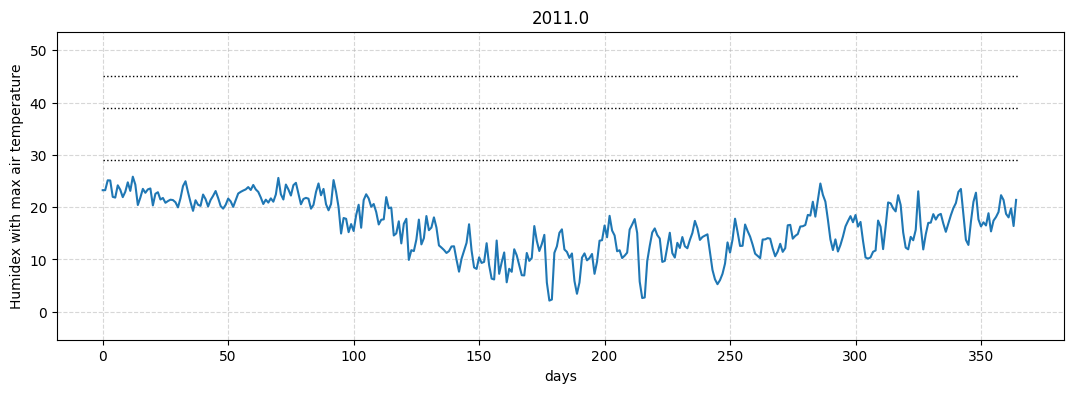

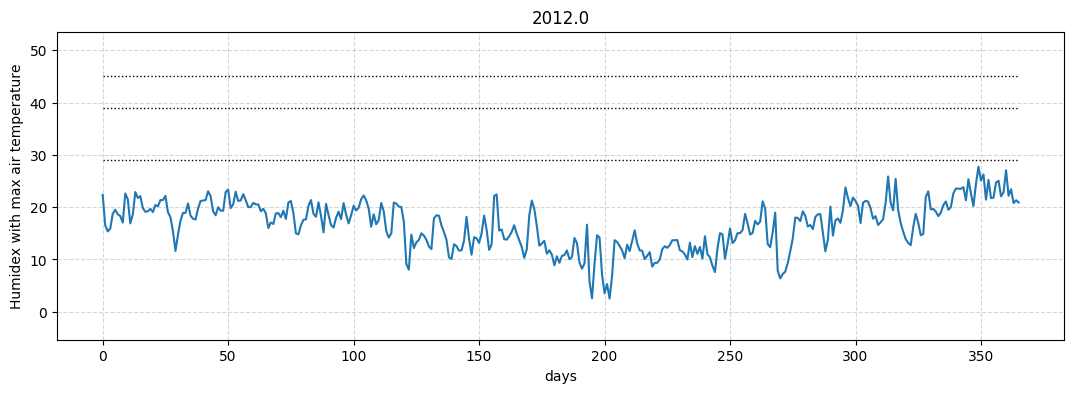

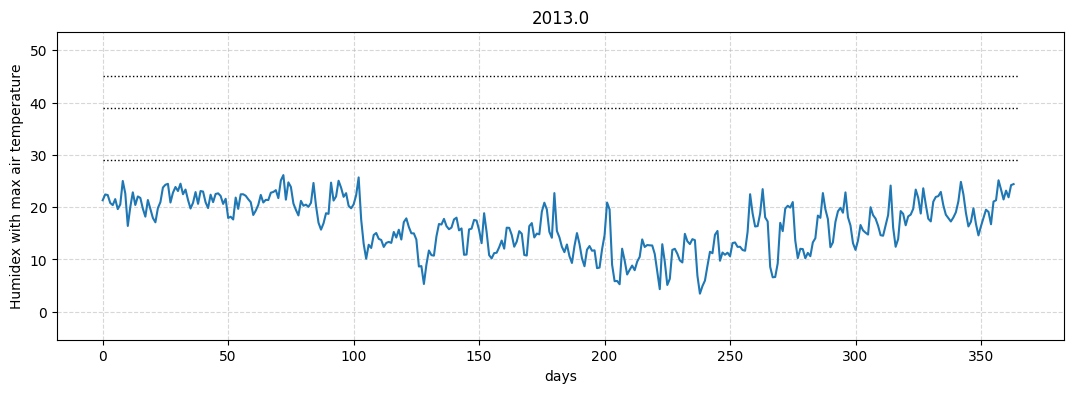

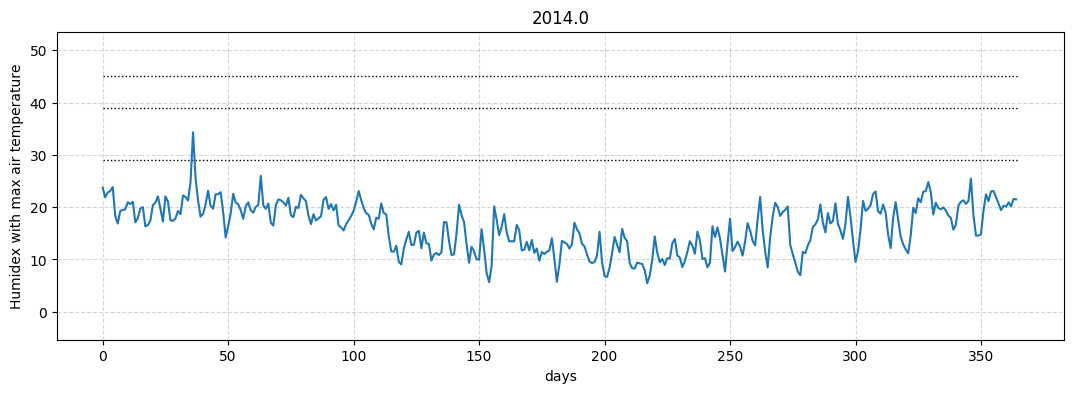

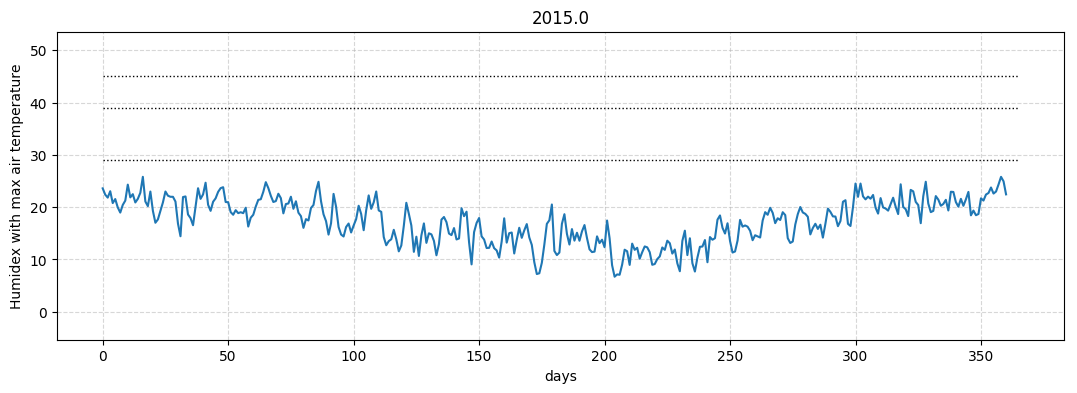

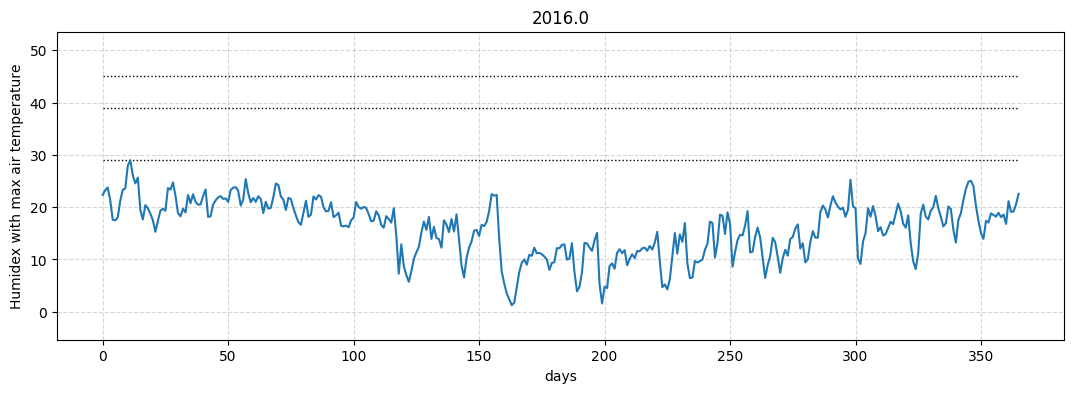

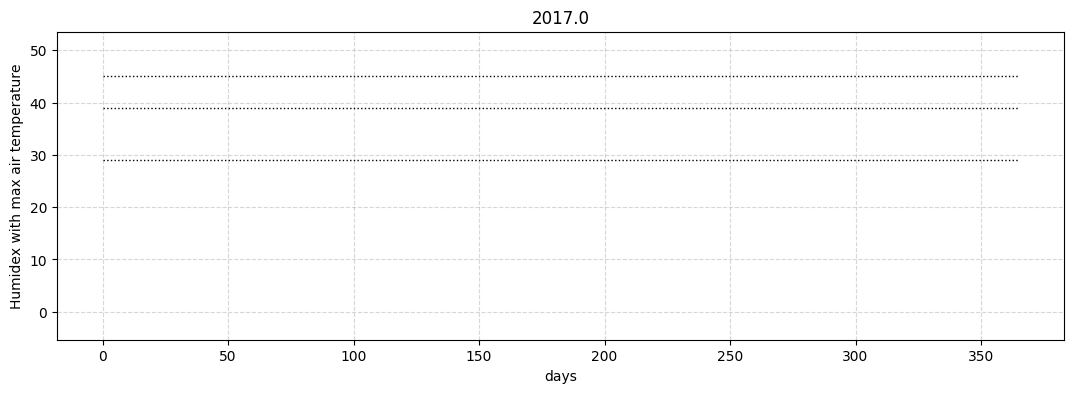

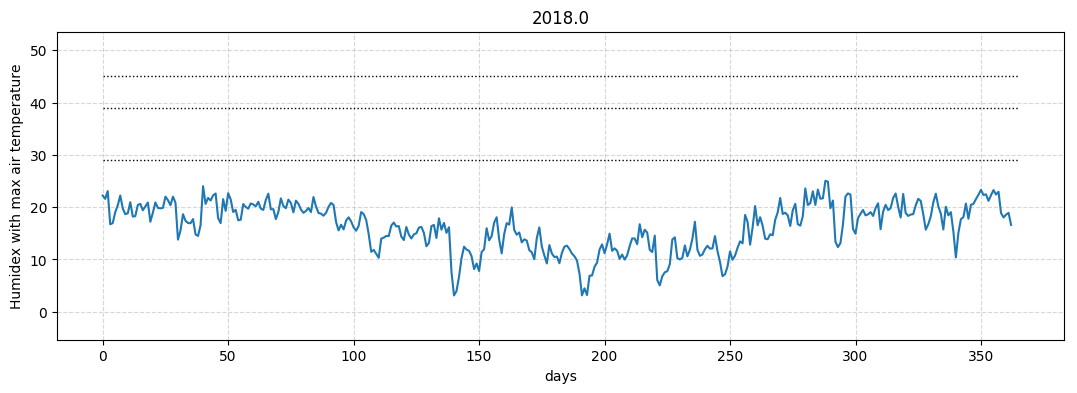

In [86]:
var1 = 'h_min2'

data.loc[data[var1] > 60 , var1] = 50

min_y_value = data[var1].min() - 5
max_y_value = data[var1].max() + 5


for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]
    
    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.plot(np.arange(data_2plot.shape[0]),data_2plot[var1])
    
    plt.hlines(y=29,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=39,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=45,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=54,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    
    plt.xlabel('days')
    plt.ylabel('Humidex with max air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
#     plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

In [87]:
data_2plot[data_2plot[var1] >=50][['MIN_N_AIRMTR_PCT10','MIN_N_AIRTMP_MED10','MAX_N_AIRTMP_MED10','h_min2','td_min2','h_max2','h_min','h_max']].head()

Empty DataFrame
Columns: [MIN_N_AIRMTR_PCT10, MIN_N_AIRTMP_MED10, MAX_N_AIRTMP_MED10, h_min2, td_min2, h_max2, h_min, h_max]
Index: []

In [88]:
get_td2(16.87,29.74)

-0.92122678594495133

# Relations between HW and humidex values

In [89]:
data[data['CTX90pct'] == 1]['h_min2'].mean()

18.159845377639805

In [90]:
data[data['CTX90pct'] == 0]['h_min2'].mean()

16.179226952059071

In [91]:
data[data['CTX90pct'] == 1]['h_max2'].mean()

38.395083794481799

In [92]:
data[data['CTX90pct'] == 0]['h_max2'].mean()

32.980784334578125

In [93]:
data[data['MAX_N_AIRTMP_MED10']>40][['MIN_N_AIRMTR_PCT10','MIN_N_AIRTMP_MED10','MAX_N_AIRTMP_MED10','h_min2','td_min2','h_max2','h_min','h_max']]

MIN_N_AIRMTR_PCT10  MIN_N_AIRTMP_MED10  MAX_N_AIRTMP_MED10     h_min2  \
315                62.14               22.68               44.80  26.662558   
387                65.31               26.26               42.16  33.147378   
388                77.00               32.72               44.76  48.560532   
389                78.20               24.47               41.45  32.317076   
390                69.79               23.84               42.31  29.788561   
391                69.39               26.97               41.41  35.210540   
392                58.02               28.21               41.40  35.046562   
393                51.69               22.18               42.30  24.312179   
1406              100.00               20.18               44.45  27.824239   
1796              100.00               17.03               41.94  22.295559   
2370               28.14               12.56               43.20   9.280210   
2371               77.90               15.74               41.34  17.934223   
2716               36.36               14.67               44.13  12.485449   
3546               54.61               19.40               41.94  20.685425   
4421               40.41               16.64               43.97  15.335035   

        td_min2     h_max2      h_min  h_max  
315   15.011797  50.000000  26.722587   50.0  
387   19.145505  50.000000  33.287321   50.0  
388   27.952026  50.000000  48.776240   50.0  
389   20.322017  50.000000  32.139405   50.0  
390   17.913472  50.000000  29.703898   50.0  
391   20.782760  50.000000  35.267077   50.0  
392   19.080978  50.000000  35.634868   50.0  
393   11.743309  50.000000  24.718984   50.0  
1406  20.079764  50.000000  27.907832   50.0  
1796  16.959418  50.000000  22.344819   50.0  
2370  -5.399695  51.376567   9.978072   50.0  
2371  11.863797  50.000000  17.657710   50.0  
2716  -0.096294  57.248816  13.019187   50.0  
3546  10.005490  50.000000  20.833122   50.0  
4421   3.132796  59.018891  15.839395   50.0